## 4.3 수치 미분

### 4.3.1 미분

* 미분은 '특정 순간'의 변화량을 의미한다.
* 수식으로는 다음과 같다.
* ${d \over dx}{f(x)} = 	\displaystyle\lim_{h \to 0}{{f(x+h)-f(x)}\over{h}}$
* 위 수식 참고하여 함수를 미분하는 계산을 파이썬으로 구현해보자.

In [1]:
# 각종 함수들

import numpy as np


def identity_function(x):
    return x


def step_function(x):
    return np.array(x > 0, dtype=np.int)


def sigmoid(x):
    return 1 / (1 + np.exp(-x))    


def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)
    

def relu(x):
    return np.maximum(0, x)


def relu_grad(x):
    grad = np.zeros(x)
    grad[x>=0] = 1
    return grad
    

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))


def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)


def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size


def softmax_loss(X, t):
    y = softmax(X)
    return cross_entropy_error(y, t)

In [2]:
def numerical_diff(f, x):
    h = 1e-7
    return (f(x+h) - f(x)) / h

* 앞의 구현에서는 $h$에 가급적 작은 값을 대입하고자 1e-50 이라는 아주 작은 값을 이용하였다.
* 그러나 이 방식은 반올림오차 문제를 발생시킨다.
* 반올림 오차는 작은 값이 생략되어 최종 계산 결과에 오차가 생기게 한다.
* 이에 미세한 값 h로 $10^{-4}$을 이용해보자.

* 두 번째 개선은 함수 f의 차분과 관련한 것이다.
* 앞의 구현에서는 $x+h$와 $x$ 사이의 함수 $f$의 차분을 계산하고 있지만, 애초에 이 계산에는 오차가 있다.
* 진정한 미분은 $x$ 위치의 기울기에 해당하지만, 위 구현의 미분은 $(x+h)$와 $x$ 사이의 기울기에 해당한다.
* 그래서 진정한 미분과 위 구현의 값은 엄밀하게 일치하지 않는다.

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAgMAAAFcCAYAAABV673oAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAAPYQAAD2EBqD+naQAAIABJREFUeJzs3Xdc1dX/wPHXRxCQNDTNxNy/UnGlIJqj3AruSlAcOHGW%0AfM20TBP3yEIb5siFlqgoOFJyC4oLARUVNbclpqCICqjA+f1xhUT28jLez8fjPorPPZ/zeV+6cd/3%0AnPN5H00phRBCCCEKryL6DkAIIYQQ+iXJgBBCCFHISTIghBBCFHKSDAghhBCFnCQDQgghRCEnyYAQ%0AQghRyEkyIIQQQhRyhvoO4EWappUGOgDXgBj9RiOEEELkKyZAFWCnUio8MyfmqWQAXSLwu76DEEII%0AIfKxPsDazJyQ15KBawC//fYbFhYWeg4ld40ZM4b58+frO4xcV1heJxSe1yqvs2DJ6dcZGxvLF198%0Agb+/P0uWLKFOnTo51nd2vOr/njv+2sFM35mYlzDn23bfUq1UtVy/ZkhICH379oXnn6WZkdeSgRgA%0ACwsLLC0t9R1LrjIzMyvwrxEKz+uEwvNa5XUWLDn5OpVSODk5ceTIEbZu3YqtrW2O9JsTXtV/z+hn%0A0Xzm/RnLzy/HsZ0jv3T8hdeMXsv1674k09PseS0ZEEIIkU+5uLiwfPly3Nzc8lQi8KpcCLuAnYcd%0Al+5dYkXXFQxsMFDfIWWYJANCCCGybdGiRUyfPp05c+bg6Oio73BeOfdgd4b+MZS3S7zNcafj1Cmb%0AN6ZHMkpuLRRCCJEtnp6ejBo1CmdnZ8aPH6/vcF6pmNgYRvwxgt6evelWoxsnhp7Id4kAyMiA3jg4%0AOOg7hFeisLxOKDyvVV5nwZLd1+nr60vv3r2xt7fH1dUVTdNyKLKclRv/PS/du4Sdhx0hd0NY2nkp%0AQyyH5NnXnx5NKaXvGBJpmmYJBAQEBBSKhTtCCJGfBQcH88EHH2BlZcWOHTswNjbWd0ivjMdZDwZv%0AHUy54uXYYLeB+uXq6zskAgMDsbKyArBSSgVm5lwZGRD51o0bNwgLC9N3GELkujJlylCpUiV9h5HE%0AjRs3sLGxoWrVqnh5eRWaROBJ7BO+2PUFP/v/TM/aPVnaZSmvG7+u77CyTZIBkS/duHEDCwsLoqKi%0A9B2KELnO1NSUkJCQPJMQhIeH06FDB4yNjfH29ub11/P/h2FGXL1/FfuN9pz+9zS/dPyF4Q2H59tp%0AgZdJMiDypbCwMKKiogpFgSpRuCUUkgkLC8sTyUBUVBRdunQhLCwMPz8/ypUrp++QXgmvEC8GbhlI%0AadPSHBl8BEvzgjWVLcmAyNcKQ4EqIfKK2NhYevXqxalTp9i/fz/Vq1fXd0i57mncU77c/SULji3g%0AY4uPWdF1BWYmZvoOK8dJMiCEECJdSilGjBiBt7c327Zto1GjRvoOKdddi7hGz409CQoN4kebH/m0%0A0acFZlrgZZIMCCGESJeLiwvLli3Dzc0NGxsbfYeT67Zd2IbjZkfMjM04NOgQjd4u2MmPFB0SQgiR%0ApsJUXfBZ3DO+2PUFXdd1pUXlFgQNCyrwiQDIyIAQQog0FKbqgjcf3KTnxp743/Ln+/bfM+b9MQV2%0AWuBlMjIgRCHm6+vLtm3bMtx+9erVnDp1KhcjEnlJfqkumBN2/LWDBksa8Hfk3/gO8OXzJp8X6Nf7%0AMkkGhCikoqOjGTBgAMWLF8/UeUOGDCEvVS4VuSM4OJiuXbvSrFkz3NzcKFKkYH5cxMbHMmHPBDqt%0A7UTjCo0JGhZEk4pN9B3WK1cw/+sKIRINGzaM0qVLM3HixCTHf/jhB6ytrWnVqlWG++rXrx9FixZl%0A7dq1OR2myENu3LiBra0tVapUKdDVBf+J/IfWbq2Zd3gec9vOZZvDNkqbltZ3WHohawaEKOCWLVvG%0A3bt3eeONNxKPxcfHs2jRokxNEQBomsaECROYNWsWffr0yelQRR5w7949bGxsKFq0aIGuLrjr8i76%0AevbFyMCIAwMO0LxSc32HpFdZHhnQNK2apmkLMtDuNU3T3DVNC9Q07YCmaf+X1WsKURhcuHCB0NDQ%0AZMfv3LnD6dOns9Tna6+9luTnQ4cO8eabb1KvXr1M99WpUydu3LjB1atXsxSLyLuioqLo3Lkzd+/e%0AZefOnZibm+s7pBwXFx/HN/u+weY3GyzNLQkaFlToEwHI3jTBQMA0A+2+A3YrpSyBMYCMLwqRhrVr%0A1+Li4pLs+KRJk1i/fn2G+zl9+jRVqlQB4J133uHrr79OfO7gwYO0bNkySfvJkyczYcKEJMdOnjxJ%0AzZo1kxwrUqQIH3zwAb6+vhmOReR9L1YX3L59e4GsLhj6MJS2a9oy69AsZrSewY4+O3jztTf1HVae%0AkOlpAk3TigJHgIrAlnTamgKNlFIjAJRSQZqmBWua1kwp5ZeVgIXIiqgoOH8+d69RsyaYZiQ9Tkf/%0A/v2xsrJiwYIFmD7v8PHjx2zYsIHAwEBmzJjB8uXL0TQtcSFfwr9rmkbLli1ZsWIF9erV49q1axgY%0AGHDlyhWKFi2aeI2QkBBat26d5LqfffYZlpaWtG3bljZt2vDkyRP69u3L559/nizGOnXqcO7cuey/%0AWJEnKKUYPnw43t7ebN26tUBWF9x7ZS99PPtQRCvCPsd9tKjSQt8h5SmZTgaUUs+AhpqmtQDSmzRs%0ABbz89WEH0AWQZEC8MufPg26b79wTEAA5sU1CtWrVsLa2ZuPGjYkFXjw8PGjcuDHVqlVj0qRJTJo0%0AKVN9vrz6/969e5QunXSh1JtvvombmxsDBgwgKCiImTNn8s477zB06NBk/ZUuXZpr165l7oWJPMvF%0AxYXly5fj5uaGra2tvsPJUXHxcczwncFUn6m0qdaG3z76jbeKv6XvsPKc3F5AWBG48tKxK8AnuXxd%0AIZKoWVP3YZ3b18gpQ4YM4eeff05MBpYvX86YMWNyrP/4+PgU76Fu3bo1/fv3x8bGhtu3b3Py5MkU%0Az9c0jfj4+ByLR+hPQa4u+O+jf+nr1Ze9V/bi0sKFSR9OwqCIgb7DypNyOxl4A/jnpWMPgMJ574bQ%0AG1PTnPnW/qp0796d0aNH89dffxEfH8+VK1fo1q0bANOmTePXX39NtSBKq1atcHNzS7P/kiVLEhER%0AkeJzo0ePZu7cuYwfPz7Z6EGCiIgISpUqlYlXJPKihOqCo0ePLnDVBX2u+dBrUy/iVTy7++2mTbU2%0A+g4pT8vtZOAe8PJ9KWZAeFonjRkzBjOzpFtEOjg44ODgkLPRCZFHGRkZ4ejoyPLly1FKMXDgQAwM%0AdN9oJk+ezOTJk7PVf+XKlbl06VKKz40ePZo+ffqwbNkyBg0aRLVq1ZK1uXjxIvXr189WDEK/EqoL%0A2tnZMX/+/AJTbS9exTP74GwmH5jMh5U/ZO3HazEvUfDuinB3d8fd3T3JsQcPHmS5v9xOBm4A7V86%0AVg24mdZJ8+fPlz3qRaE3ePBgWrVqRZEiRfDzy9klNtbW1ixatCjZ8bVr13LmzBkCAwNZtGgR/fv3%0Ax9fXN9kHhZ+fH8OGDcvRmMSrk1BdsGnTpqxevbrAVBe8+/gu/bz6sevyLiZ9OAmXFi4FdlogpS/I%0AgYGBWGVxcVRuvwMOAB+8dKwTsDWXrytEvlejRg2qV69OvXr1qFy5cpb7Sal0cNu2bfH39+f69euJ%0Ax/7++2+cnZ1ZtWoVRYsW5dNPP0Uphaura5JzDx06xKNHj2jYsGGWYxL6c+PGDWxsbApcdcFDNw7R%0AYEkDAkID+LPvn0xrNa3AJgK5IUeTAU3TLDVN+yPhZ6VUFHBU07TBz59vAFgopQ7n5HWFKKiePn2a%0A7W/gNWrUwNAw6SBgyZIl6dmzJzNnzkw89r///Q8nJ6fEbxZFihRh+fLlzJw5M0kRpBkzZjB06NDE%0AaQuRf4SHh9OhQweMjIzw9vZONh2bH8WreOYemkvLVS2pVqoaJ4edpP3/vTwgLdKTnWmCSCDspWMl%0AgZcrVYwDlmuaNur5OX2zcU0hCo3t27dz9+5dOnfunK1+QkJCUjw+ZcoU3nvvPXr16kXr1q2ZMWNG%0AskIzNWrUwM/Pj7JlywKwatUqLly4gIeHR7ZiEq9eVFQUXbp0ISwsDD8/vwJRXTA8Kpz+m/uz/a/t%0AfNXsK6a3no5hkYJbZT8qCv7997/H3btJH5cvZ73vLP/WlFJBQNBLx/bxUjLwfHRAVv4JkUHBwcF0%0A7twZY2Nj3N3dc+0b+Ntvv83q1asTv/W/XGkwgYWFReK/R0ZGsnbtWkqUKJErMYnc8WJ1wf379xeI%0A6oJHbh6h58aeRD2LYkfvHdi+m3/rI0RGwt9/w61bukdoaNJ//vsv3L4Njx4lPU/T4I034M03dQ8T%0Ak6zHUHBTKCHyqbp16yaZy89NHTt2zFT70aNH51IkIrcopRgxYkSBqS6olGL+0fl8uedLGr3diHWf%0ArKOiWUV9h5WqJ0/g5k24fv2/x82bug//hMfDh0nPKVkSypfXPapVg6ZN4a23/nuUKwdly0Lp0vDi%0ADGBgYNaLq0kyIIQQBZiLiwvLli0rENUF70ffZ8CWAWy9sJUvmnzBrDazKGpQNP0Tc1F8vO4b/JUr%0AyR9Xr+qee1G5clCxou7Rrh1UqPDf4+23wdwcihV79a9DkgEhhCigEqoLzp07N99XFzz+z3HsPeyJ%0AfBLJ1l5b6VKjyyu9/t27urLmf/0FFy/q/vnXX3DpEkRH/9cu4dv8//0ftG0LlSv/96hYEfLqzRuS%0ADAghRAGUUF3Q2dmZcePG6TucLFNK8dPxn/hi1xc0MG+AzwAfKpfM+q22aV9LN0d/5gycOwchIf89%0Awp+XytM0qFQJ3n0XmjeHQYPgnXd0H/5VqujnW31OkGRACCEKmITqgvb29ri6uubb6oIPYh4weOtg%0ANoVs4n+N/8fcdnMxMjDKkb4fP4ZTp+D0aQgO1j3OnIH793XPFysGNWqAhQW0b6/7Z82aug/+7CzU%0Ay6skGRBCiAIkobpgs2bNcHNzy7fVBQNDA7HzsCM8KhxPe08+svgoy33du6fbqCwo6L/HxYu6kQAD%0AA92Hft26ug/9unWhTh2oWhXy6a8uSyQZEEKIAiKhumDVqlXzbXVBpRSLTixizM4x1C1bl939dlOt%0AVPL9MVITHQ0nT8Lx4/89ErbheO01qF9ft3Bv/Hho0ABq1cq78/ivkiQDQghRACRUFzQ2Nsbb25vX%0AX395j7i8L/JJJE7bnNhwdgOfWn/Kd+2/w9gw7U/qf/4BPz84fFj3z5MnITZW9wFvaQkdO0KjRtCw%0AoW6IXwpnpkySASHyMS8vL44cOcK3336b5HhMTAwffPABT548QSlFWFgYcXFxlCtXDqUUxsbG7N+/%0AnxIlStCjRw+mTJlCnTp1kvV/9uzZZJuhWFpasmrVqsSfnZ2dsbGxyfBta/7+/gwaNAhN01BKcf36%0AdUqXLp1YyKhOnTqsXbsWgOrVq3Px4sU0+1uyZAlKKYYPH57suS1btuDn55fs91PQvFxdsFy5cvoO%0AKdNO3T6FnYcdtx/dZkOPDdjVtkvWRindCv4DB8DHR/fhn1CSo1o1aNZMt6CvcWPdcH9R/d51mK9I%0AMiBEHjRp0iS2bNmCpmk8e/aMS5cuYWFhgVIKTdOYNGkS9vb2REZGEhERkex8ExMT/P39E3+eO3cu%0AERERzJ49O1nb8PBwIiMjU4yjdu3anD59Os1YIyMjefhy1ZQ0WFtbExwcnPhzx44dcXZ2pkOHDsna%0AXrt2Ld3+bty4keqHX0RERIq/n4LkxeqCBw4cyHfVBZVS/Br4K6O9R2PxpgWBwwJ55413nj+nK7G7%0Af78uAThwQLfa38BA963/4491CUDTprr780XWSTIgRB40Y8YMZsyYAcDdu3dp0KBBuh/Kabl58ybh%0ACfdGZUB8fDzNmzfn0cv1TyExIRkxYgQjRozIckwJbty4kaEP/dRcv36devXqZTuO/ChhRMTb25tt%0A27ZhbW2t75Ay5dHTRwz7Yxhrg9cy3Go4823mE/PIBE9P2LULdu6Ea9d0C/msrKBvX2jZUpcA5MNZ%0AkDxNkgEh8rg7d+4QHh5OXFxclvYpePr0KXv27OHx48eEh4dTunRpOnToQGhoKEqpFD+IixQpwuHD%0Aub+56NmzZ7l//z6rV69m2LBhXL9+ne7duxMXF5fi1sspOX78OC4uLrkcad7k4uLC8uXLcXNzw8bG%0ARt/hZErwv8HYedjxz8N/mNFgLbEBDrSeBceO6ar61agBXbroFvu1aCEf/rlNkgEh8rhdu3ZhZGTE%0A7t27M/0HPz4+ntGjR2NnZ0fJkiVxcHDAy8uLnTt3JrZp1apVqudfuHCBhQsXcvr0aSIiIihfvjwd%0AO3Zk0KBBmJqaZvk1Ady/f59Bgwbh5ubGDz/8wMSJE5k5cyZBQf/tf2ZklPY95efPn+fy5cs8e/aM%0AuLg4mjdvzoMHDwDdt+bIyEg6deqUrTjzqvxaXVApxeLjK/nfzk8p/vQdTD1PMCmkBmZmulv7Bg3S%0AJQCVc6eukEiFJAOiUIiKiuL8+fO5eo2aNWtm+wPyZREREfz666+sW7eOL7/8klatWmX4drHLly/j%0A7OyMiYkJv/zyC0WKFCE8PJymTZvi6upKmzZt0jw/JCSE1q1b4+zsjIODA8WLF+fWrVusXLmSLVu2%0AsHv37sS2Y8eOZcaMGUyYMCHZgsOU+Pj4MGLECJycnGjbti3vv/8+H3/8MR999BFz5syhRo0aAOmO%0ADvz8888MHjyYHj16MG3aNI4cOZLkeTc3N/z8/NKNJ7/Jj9UF790Dj82PmRE0kr/LrIaAIZT660e6%0AdSxGl190Q/+y4E+PlFJ55gFYAiogIEAJkZaAgACVmfdKQvvcfOT0+/bRo0eqRYsW6rffflNKKTVh%0AwgTVtm1b9ejRo8Q2q1atUk5OTsnO3bBhg6pYsaJauHBhsuf27t2rGjVqpH755RellFItW7ZUfn5+%0Aydp999136ssvv0wxtrfeekvdu3dPKaXUgAED1Pr16zP8upydndV7772n9u7dm+y5RYsWqapVq6pT%0Ap04ppZQqWrRoqv0cOnRI1alTRz179kzdunVLNWzYUM2ePTtJm9R+P/nJy+91Hx8fZWxsrHr27Kni%0A4uL0HF3a/v1XqSVLlGrXTimDcmcVI2upIt+YKofZa9SFC/qOruB54e+cpcrk56+MDIhCoWbNmgQE%0ABOT6NXJKQEAATk5OODo60qdPHwBmzZrFV199haWlJUuXLqVFixapnt+9e3e6deuW4jB769atOXbs%0AWOLPqZWqbdOmDY6Ojtja2tKsWTMMDQ2JiIhg5cqVvPvuu5QqVSpLr23GjBkUL148xeeGDx+e5BbB%0ALVu2pNjuypUrDBkyhDVr1mBoaIi5uTm7d+/mww8/BOCrr77KUmx5XX6oLvjgAWzaBGvX6u4CAKhh%0AvxqD4SN4p1RVvBxOYPGmhX6DFMlIMiAKBVNTUywtLfUdRoZEREQwYsQI5s6dS7t27ZI8N2fOHFq2%0AbMmSJUvSTAaKZmK8derUqSn+burXr4+7uzuurq588cUXPHv2DDMzMzp16oS3t3fGX9BLihcvzvHj%0AxwkLC6Njx45ptvXz80tWv+DmzZvY2Njwww8/0LBhw8TjJUuWZOfOnXz44YfY29tTrVrGq9blB6Gh%0AoQwbNixPVheMiYEdO+D332H7dnj6FFq1gh9+ieJIyc9Ye34FA+oP4Gfbn3nN6DV9hytSIMmAEHlM%0AyZIlOX78OP369ePDDz9M9kffxsYmcSFh2bJlqVChQqp9hYaGsnDhQvbs2UNERETiHLymaZQpU4YO%0AHTowcuRITFLZeeWvv/7iu+++S3MU4O2336Zs2bKZeo3+/v5cu3Yt3WRg7ty5ibdYJtA0jbVr13Lq%0A1Cni4+OTfDs2NzfnwoULicfKlCmT5u8nP/n0008xMjLKM9UFlQJ/f1ixAtat040IWFnBrFnQsyc8%0AMr6AnYcdly5dYmW3lQyoP0DfIYs0SDIgRB514MABHjx4kOYHra2tbaqV//7++29at26Ni4sL48aN%0Aw8zMLMnz4eHhbNq0iaZNm+Ln50eZMmWS9bFkyRLeeOONxOH3lLz8YZ1RK1euZOfOnSkuEkyoTpjS%0AFEaFChWoUKECdnZ22NraUr58+STPv5gcdOrUqcDcTRAREcGxY8f0Xl3wzh347TddEnD2LFSoAJ99%0ABn366Hb1A1gbvJah24ZS0awix52OU6ds8uqWIm+RZECIAsrX15eWLVsmrjl4WenSpRk6dCi7du3i%0A6NGjdO7c+ZXGN2jQoHTLBGdmuqOg++GHH/RWXTA+HvbuhUWLYNs2XRGg7t3B1RXatPmv3n9MbAzO%0A3s4sDVxKn7p9WNx5McWNUl4fIvKWvLf6RAgBwOuvv87t27ezfH6HDh04ceIE06ZNIygoKEnJ4MjI%0ASPz9/fnqq6+4efNmqrUGshtDagwNDblz506abe7evZtmMlC8eHH+/fffnA4tz0pp74jcdv8+LFig%0A+8bfvr1u9z9XV11J4PXrdccSEoG/wv/i/WXv43bKjV+7/Mqaj9akmAicO3eO2rVrc+7cuVf8akRa%0AZGRAiDxq7ty5ODk5ER0dnWobpRTFihXDz88v2Qdn6dKlOXLkCB4eHixYsIBLly4llhc2MzOjevXq%0AtG/fnpkzZ6Za2XD8+PGMHj06zakApRRmZmYcOnQow6+tU6dOrFu3LtUywkopDAwM+Oabb1LtY+bM%0AmQwfPjzLvx+RupMn4eefdXcExMZCjx66aYFmzSClm082nN3AkK1DKFe8HMeGHOO9cu+l2ndMTAzn%0Azp0jJiYmF1+ByCxJBoTIozp37pztoXtjY2P69u1L3759s3S+lZVVrhTtqVChAvsT7jvLoq5du9K1%0Aa9ccikjEx+vuCPj+e92GQBUqwMSJMHgwpLZM4UnsE8buGstC/4X0qtOLpZ2XUsK4xCuNW+QMSQaE%0AEKIQi46GNWtg/nw4f163/e+GDfDRR2CYxifElftXsPOw48ydM/zS8ReGNxyeas0KkfdJMiCEEIXQ%0A/fvw00+6R3i4bkHgsmW67YDT+0z3DPFk0JZBlDYtzZHBR7A0zx81PETqJBkQQohC5O5d3SjAzz/D%0As2e6jYHGjIF33kn/3KdxTxm/ezw/HPuBTyw+YXnX5ZiZmKV/osjzJBkQQohC4NYt+O47WLxYdwfA%0AyJHw+efw1lsZO/9axDV6buxJUGgQP9r8yKeNPpVpgQJEkgEhhCjAbt+GmTNh6VIwNYVx42D0aChd%0AOuN9bL2wlf6b+1PSpCR+g/ywfts69wIWeiHJgBBCFED37sG338KPP4KxMbi4wKhRYJaJUf1ncc+Y%0AsHcC3x/5nm41urGy20pKFcvaBlUJzM3NcXFxwdzcPFv9iJwlyYAQQhQgDx/CDz/AvHkQFwdjx+oe%0AJUtmrp+bD27Sc2NP/G/549relf+9/78cmRYwNzdnypQp2e5H5CypQChEIfDJJ59w5cqVZMdDQkLo%0A0aOHHiLKPjc3N+rWrUu9evUSHwsXLkzSpmHDhjx48CDDff7yyy+JfdatWxcDAwPq1q2beGz+/PkA%0ABAYG0qtXr3T769u3L2fPnk3xubFjx7J9+/YMx5aeZ890iwKrVYPp03ULA69c0f17ZhOBHX/toP6S%0A+vzz8B8ODjzImCZjZH1AAScjA0LkQf7+/gwaNCjNP8Dx8fE8ePCAuXPn0rt37zT7u3jxIk+ePEl2%0APCoqinv37qV63ujRo9m9e3fixkEvSjj28OFDvv76a0aOHJnOq/pP27Zt0yxHrJQiJiaG9957j/Xr%0A16dYIbF///70798/zevcu3cvxdedmpEjRyZ5HaampgQEBGBkZJSk3cOHD9P8vSW4evUq8fHxqcaW%0AmUQlNUrp9gsYPx4uXoQBA2DKFKhUKfN9xcbHMmnfJOb6zaVz9c64dXfjjWJvZDtGkfdJMiBEHmRt%0AbU1wcHC67fz9/XFycko3GQgLC0txV8L0/Pjjj+m2OXDgANOnT89UMrBnz54MtatZsyYhISFJ6vKf%0APXsWBweHFNsn7HS4YsUKGjZsmOKOiBl19+5dYmJiuHr1KjVq1Eh2nYy4fv16prd3zoygIN0UwP79%0A0Latbr+A91KvBJymfyL/odemXhy5eYRv237L2KZjKaLJ4HFhIcmAEPlYqVKliIuLS7NNdHQ0MTEx%0AvPnmm7kSQ2RkZK4NIZcqVYqnT58mOVa7dm1Onz6dK9d7kYeHB+XKlcPNzY1Zs2axefNmvvnmGzRN%0A49GjR7yTzo35t27dQinFWxm9dy8Tbt+GCRPAzU23idD27WBrm36xoNTsvLSTvl59MTYwxmeAD80q%0ANcvZgEWeJ8mAEPnYo0eP0l2V7e/vn6VRAYD58+czb948ihdPeRvahI2Avvrqqyz1n55nz56lusHQ%0Avn37WLFiBZcvXyY2NpbKlSvTp08fPvroo2xfNzg4mPnz53PgwAFsbW1p1qwZ3bt3p3v37gD4+Pgw%0Ac+bMNPvYunUrJUqU4MGDB/z999/Y29snjigopbh9+zbt2rXLVFyxsbBwIUyeDEZGun93ckq7bHCa%0A/cXHMuXAFGYdnEWHdzqw5qM1lDHN2ntF5G+SDIhCIepZFOfDzufqNWqWqYlpUdNcvcbLTp06hYWF%0ARZptDh8+zPXr1/njjz8yvfGRm5sbBw4coHr16tkJM8vCwsIol8IuOWvWrGHatGl8/fXXjBkzBgMD%0AAy5evMisWbM4d+4cEydOTGzbokULjIyM2LhxI++++26a14uLi8PNzY0pU6bw22+/Ub16dbZv307X%0Arl05dOgQ48aN44030p9Dj4uLY8mSJXz00Ud88MEHuLu7J1tIOHDgwAz+FnQCA3XrAc6cgREjdAsD%0AMxBKqkIfhtLbsze+132Z2XomXzb/UqYFCjFJBkShcD7sPFZLrXL1GgFDA3KkRvuBAweYOnVqhtr6%0A+PgAugWCmzZtwtQ0eTKyc+dOFi1axLRp02jTpg3FihXLcCxxcXHJFs+9KpcvX8bAwCDF6Y0NGzbw%0A008/YWNjk3isfv361KtXj549eyZJBnx9fTM8RdKwYUMqVqyIj48PVatWBXTrFgICApg2bRpNmjTh%0A3Llz6faweocJAAAgAElEQVTz7bff0rBhQ2bPnk2XLl3o3Lkzy5Yto02bNhmKIyVOTrpNhPz9wSqb%0Ab+W9V/bS27M3BpoB+xz30aJKi+x1mAnR0dFcuXKFatWqZeq9KHKXJAOiUKhZpiYBQwNy/Ro54fHj%0Axxn+I5nwYWhsbJzivP3Nmzc5c+YM/fr1w9DQkClTpjB37twkbfz9/bG0tKRSpUps3rw5yXOmpqb0%0A6dOHSuksTTc1NeXXX3+lSJG0v1lGRUVRunTpDK/w1zQNAwMDli5dyuDBgxOPd+nShR9//JFKlSph%0AYWGBpmlcu3aNOXPm0KVLlyR9ZGYRoa+vLyVKJN+Ct0SJEsybN4958+YBYGlpiYuLS4p97NixA3d3%0A98RErWnTpnh6emJjY8P69etp2bJlhuN50Tff6O4SSOdXnKa4+Dim+05nms802lZry28f/0bZ13Jv%0AgWNKQkJCsLKyIiAgAEtL2eAor5BkQBQKpkVN883Oap06daJTp0450tfChQtxcnLCyMiIfv36YW1t%0Azfnz56lZ87/Exdramn379qV4/rRp03B1deXff/9NPHbgwAEaN26cJGExNTUlPj4+3WTA1NSUJUuW%0AEBMTk+w5V1dX7OzsqFixYrLn2rdvn+TnoUOHUqFCBSZOnMi1a9cAXTGbvn37pntnRVpKlCiBm5sb%0ALVq0oEqVKqm2e/DgAcHBwTRrlnSh3a5du/j888/x9vamVKn/KvU1aNCA9evXM2LECEJCQrIUW/fu%0A2UsE/n30L308+7Dv6j6mtpzK1x98jUGR5LdsisJJkgEh8qDY2Fh8fHyyNax8+/Ztfv/9d06cOAFA%0AkSJF+PLLL5k8eTIbNmzIUB8dOnSgQ4cOSY5Vq1aNXbt2pfgNOiMcHR1TPO7u7o6dnR316tXLUD+3%0Ab9/Gy8srzTY1atRIceokLX/88QdlypRJMxm4dOkSnp6eDB8+PMlxMzMzdu7cyf79+xOnGRK0bNky%0AybqB8uXL58qdBik5cO0ADpscUEqxx3EPrau2fiXXFflHlvJMTdOGaJp2UtO0IE3TBqTTtr2maQc1%0ATTuuaZq/pmmjsxSpEIXI5cuXGTduXLb6+Pzzz/n888+TfOB88sknnDhxggsXLmS5X6VUtu7fzymj%0ARo1Kt82ff/6Z6p0Q6fWdUIXwxUfCsUGDBqV4XuPGjQFSvdPgxZGTmTNnZivZy4h4Fc8M3xm0Wd0G%0AizIWnBx+UhIBkaJMjwxomtYEsAcaAgbAn5qmnVFKnUihbRVgLtBeKXVX0zQjYJWmaXeVUu7ZilwI%0Akao1a9YQHh7O//73vyTHDQwM+Oyzz/j555/56aef9BRdzsjN8ri//PILHTt2TPX59G4tzAule+8+%0Avktfr77svrybbz78hsktJsu0gEhVVqYJhgGTlVKxQKymad8Aw4EhKbStD+xVSt0FUEo91TTtN8AG%0AkGRAiFSYmJgQERHB06dPs7Sav1q1ari7u6f4oTRkyBBWrFiR5vm3bt2iY8eOKZbSLVGiBM2bN09y%0ATClFkSJFcHNzo379+pmONytKlCjBnTt3crzCn6GhIbdv306zzZ07dzBM5eb+1157jcjISJ48eYKx%0AsXGOxpZRB68fpNemXjyLe8bOvjtp93+Zq2cgCp+sJANNgBdvkD0CLE+l7XFgpqZpy5VSIZqmlQE+%0AA5Zk4bpCFBqVK1emW7duNGzYMM12SinKlCnD/v37kxx/eWHbi0qUKIGzszMAVapUoV+/fsnalC9f%0AnpMnT2Yh8qwzMjLKVOLz7bffYmNjQ2xsbJrtWrVqxQ8//JDhfgcPHsxXX33FggULUnxeKYWJiUmq%0At3+WKVOGkSNH8v7776dbHbJRo0YsW7Ysw7GlJ17FM89vHhP3TaRZpWa4f+JO+RLlc6x/UXBlKhnQ%0ANK0Y8Ei9MGGolIrTNC1K0zQjpVSSuqFKqVuaprkCZzVNuwZUANyVUknvXxJCJJOwQ15uKl26dKaL%0A3+SWTZs2ZWp+PyMbFWVF27ZtExddZtXkyZOZPHlyDkWUMeFR4ThudmTHXzuY0HwC01pNw7CIrBEX%0AGZPZd0opIDKF45HAG0CSsTVN08oDXwIfKKX8no8MrNU0zU4p5ZGVgIUQBVNWFvoJncM3D9NzY0+i%0An0Wzo/cObN+11XdIqbKwsODMmTNUq1ZN36GIF2Q2GbgPmKVw3AxIaT9PR2CxUsoPQCkV9vzug21A%0AqsnAmDFjMDNLehkHB4dUdyoTQojCSCnF90e+Z8LeCTR6uxHrPllHRbPkdRrykmLFilG7dm19h5Hv%0Aubu74+6edOlddrbEzlQyoJSK1jTNVNM0LWGqQNM0A8D45SmC5yoDm17q45amaa+ndZ358+dLZSoh%0AhEjDveh7DNg8gG0XtzGu6Thmtp5JUYOUN3USBU9KX5ADAwOxymKt6qxMKB0G3ke3cBCgKXAwlbZX%0AgRpA4ublz6cKUppqEEIIkQHH/zmOvYc9kU8i2eawjc7VM7cBlRAvy0rRoSXAFE3TjDRNMwGmPj+G%0ApmmWmqb98ULbVcAoTdNqP3/eFPgVSHmZrhBCiFQppVhwdAHNVzSnXPFyBA0LkkRA5IhMjwwopY5p%0AmrYe8AcU4KqUStgBpiRQ/YW2dzRNGwT8+nxqoAi6NQRrsh+6EGS5zrsQ+UXCe/zhk4d8suETvM57%0AMeb9McxpOwcjA/3sKCkKnizdd6KUWgEkq1qilNrHC8nA82NH0U0lCJFjypQpg6mpKX379tV3KELk%0AumKmxei3sx+RJpF49fSie83u+g5JFDByE6rIlypVqkRISAhhYWH6DkUUEh4eHsyZM4fPPvuMAQMG%0AJHkuOhpmz4bt2+GTT+CLLyALhSOTUUrhcdYD19OuvPX2W/j08KFqqarpnyhEJkkyIPKtSpUqUalS%0AJX2HIQoBT09P5s6di7OzM/Pnz09S5vnyZRgwQPfPNWsgpwarHsQ8wGmbEx5XPfiszWfMazcPY0P9%0AlDfOSaGhoSxZsoRhw4Zhbm6u73DEc9nYHVsIIQo+X19fevfujb29Pa6urkkSgd27wdoaYmLg2LGc%0ASwRO3j5Jw18bsvPyTjzsPPjR9scCkQiALhmYOnUqoaGh+g5FvECSASGESEVwcDBdu3alWbNmuLm5%0AJW5BrBTMnw82NtC4MRw/DnXqZP96SimWnFjC+8vep4RRCQKGBtCjVo/sdyxEOiQZEEKIFNy4cQNb%0AW1uqVq2Kl5dX4g6E0dHQvz98/rlubcAff0DJktm/3sMnD+nj2Yfh24czqMEgDg8+zDtvvJP9joXI%0AAFkzIIQQL7l37x42NjYYGRnh7e3N66/riqb+8w989BEEB8PatZBTFdJP/3saew97/nn4D+6fuNOr%0ATq+c6ViIDJJkQAghXhAVFUWXLl24e/cufn5+lCtXDgB/f+jaFQwN4dAhyGLV1ySUUqwIWsGn3p9S%0AvXR1AoYGUL109fRPFCKHyTSBEEI8FxsbS69evTh58iQ7duygenXdB/OmTdCiBVSpAidO5Ewi8Pjp%0AY/pv7s+QbUPoV68fRwcflURA6I2MDAghBLpv6SNGjMDb25tt27ZhbW2NUjBvHnz5JfTsCStXQrFi%0A2b/W2TtnsfOw4/qD66z5aA1960nxLKFfMjIghBDAlClTWLZsGcuXL8fGxoZnz8DJSZcITJqkWyOQ%0AE4nA6lOrabSsEUW0IpxwOlHoEgETExNq1aqFiYmJvkMRL5CRASFEobd48WKmTZvG3LlzcXR05P59%0A6NEDDh6EVat0dw9kV9SzKD7d8SkrT65kQP0BLOy4ENOiptnvOJ+pVasWZ8+e1XcY4iWSDAghCjVP%0AT09GjhyJs7Mz48aN4/p1sLWF27d1RYVatMj+Nc6HncfOw47L9y6zqtsq+tfPgexCiBwkyYAQotA6%0AePBgkuqCp09r2NqCiQkcPQrVc2A93++nf2fYH8OoZFYJfyd/apetnf1OhchhsmZACFEoBQcH06VL%0Al8TqggcOFOHDD8HcHI4cyX4iEP0smqHbhtLXqy8fW3zMcafjkgiIPEtGBoQQhU5CdcEqVarg5eWF%0Al5cxjo7QsqXuNsISJbLX/8Xwi9h72HMh/ALLuixjUINBSfY0ECKvkZEBIUShEh4eTocOHShatCje%0A3t4sX/46Dg66Wwf/+CP7icD6M+uxWmpFdGw0x4YcY7DlYEkERJ4nyYAQotBIqC4YFhbGn3/uZP58%0Acz7/XHf74OrVYGSU9b5jYmMYtX0UvTb1onP1zpxwOkG9t+rlXPBC5CKZJhBCFAoJ1QVPnTrFnj37%0AmTevOsuXw4IF4Oycvb4v37uM/UZ7zt45y+JOixlqNVRGA0S+IiMDQogC78XqguvWbeL77xuxapVu%0ANCC7icCmc5uwXGrJg5gHHBl8hGENh0kikIZz585Ru3Ztzp07p+9QxAtkZEAIUeC5uLiwbNkyli51%0A4+efbfDx0S0U7NYt630+iX3C+N3j+fH4j/So1YNlXZZhZmKWc0EXUDExMZw7d46YmBh9hyJeIMmA%0AEKJAW7RoEdOnT8fFZQ4rVzoSHAze3tCqVdb7vHr/Kj039uTUv6f4yfYnRlmPktEAka9JMiCEKLA8%0APT0ZNWoUQ4Y44+k5nn/+gX37wNo6631uOb+FAVsGUNKkJH6D/GhYvmHOBSyEnsiaASFEgeTr60vv%0A3r3p3NmeAwdcCQ/XOHgw64nAs7hnjN05lu7ru9OqSiuChgVJIiAKDBkZEEIUOMHBwXTt2hUrq2YE%0AB7uhVBEOHoRq1bLW340HN+i5sScnbp1gfof5ODd2lmkBUaBIMiCEKFASqguWL1+V69e9MDExZu9e%0AqFw5a/1tv7gdx82OFDcqzqGBh2hcoXHOBixEHiDTBEKIAuPevXvY2NigaUaEh3tTosTr+PhkLRF4%0AFveML3d/SWf3zjSr2IygYUGSCIgCS0YGhBAFQlRUFJ07d+b27buAH2+/XY49e+CttzLf19+Rf9Nr%0AYy+O/n2Uee3mMbbJWJkWyCHm5ua4uLhgbm6u71DECyQZEELkewnVBYOCTmFkdID/+7/q7NoFZcpk%0Avq8/L/1JP69+mBia4DvQl6YVm+Z4vIWZubk5U6ZM0XcY4iUyTSCEyNcSqgvu2OGNoeEmatSwZu/e%0AzCcCsfGxTNw7EdvfbbEub03QsCBJBEShISMDQoh8bcqUKSxbtgxTUzcsLGzYtQtKlsxcH7ce3qL3%0Apt4cunGI2W1mM77ZeIpo8l1JFB6SDAgh8q3Fixczbdo0ihWbS+3ajllKBPZc2UPvTb0palCU/f33%0A80HlD3InWCHyMEl9hRD5kqenJyNHjsTY2JnatcdlOhGIi4/DZb8L7de0p4F5A4KGBUkiIAotGRkQ%0AQuQ7vr6+ODj0pmhRe+rUcWX3bi1TicDtR7fp49mHA9cOMLXlVCZ+OFGmBUShJsmAECJfCQ4OplOn%0ArsTHN6NePTf27CmSqURg/9X99PbsDcCefntoVTUbOxYJUUBIKiyEyDdu3LhBu3a2REdXoXZtL/bs%0AMc5wIhCv4pnuM522a9pS681aBA0LkkRAD6Kjozl79izR0dH6DkW8QJIBIUS+EB4eTqtWHQgLK8q7%0A73qzd+/rlCqVsXPvPL6DzW82uBxw4ZsPv2FX312UK14udwMWKQoJCaFOnTqEhIToOxTxApkmEELk%0AeVFRUbRr14Vr18KoUsUPHx9zSpfO2Lm+131x2OTAs7hn7Oy7k3b/1y53gxUiH5KRASFEnhYbG0u3%0Abr04efIU5ctv59Ch6pQtm/558Sqe2Qdn09qtNe++8S4nh5+URECIVMjIgBAiz1JK0b//CPbs8aZs%0A2W0cPtyIjJS0D4sKw9HLEe9L3kz8YCJTWk7BsIj8uRMiNfJ/hxAiz/riCxfWrl3GG2+4cfSoDRUr%0Apn+O3w0/em3qRfSzaLz7eGPzjk3uBypEPpelaQJN04ZomnZS07QgTdMGpNPWUNO0BZqmndI0LVjT%0AtMlZilQIUah8//0iXF2nU7z4XI4edaRq1bTbK6X47vB3tFjVgspmlTk5/KQkAkJkUKZHBjRNawLY%0AAw0BA+BPTdPOKKVOpHKKCxChlHpP0zRDYLOmaR2VUjuyHLUQokD7/XdPvvhiFMbGzhw+PI533027%0A/b3oewzYPIBtF7cxvul4ZrSeQVGDoq8mWCEKgKxMEwwDJiulYoFYTdO+AYYDQ15uqGmaMdAVaACg%0AlIrVNG0mUCHrIQshCrI9e3xxdOyNoaE9Pj6u1K2rpdn+2N/HsN9oz6Onj9jmsI3O1Tu/okiFKDiy%0AMk3QBDj2ws9HgNQKejcEDiul4hMOKKWOKKU8snBdIUQBFxgYjK1tV6A5O3a40bhx6n+ilFIsOLqA%0AD1Z+QPkS5QkaFiSJQD5gYWHBmTNnsLCw0Hco4gWZGhnQNK0Y8EgppRKOKaXiNE2L0jTNSCn19KVT%0AagK3NU2bhy5hUMBCpdRv2Q1cCFGwXL16g+bNbYmNrcrGjZ60a2ecatuImAgGbRmE13kvPn//c2a3%0AnY2RgdErjFZkVbFixahdu7a+wxAvyew0QSkgMoXjkcAbwO2Xjr+JbgphsFJqnKZpJYF1mqZFKKX+%0AyHS0QogCKTz8HpaWNkRHG7F0qTeffPJ6qm1P3DqBvYc992Pus7nnZrrV7PYKIxWiYMpsMnAfMEvh%0AuBlwL4XjRYF1CYsFlVIRmqZ9DnwLpJoMjBkzBjOzpJdxcHDAwcEhk+EKIfK6qKgo3nuvMxERd5k9%0A2w8np5TLBCulWOi/kLG7xvLeW++x13EvVUulc4uBEAWUu7s77u7uSY49ePAgy/1pL4z4Z+wETTsP%0AWCRMFWiaZgCcUUolmwDSNO1/6KYVlr1wrBhwRClVP4X2lkBAQEAAlpaWmXslQoh8JzY2lnr1PiYk%0AZC9jxhzA1dU6xXYPYh7gtM0Jj3MejG40mnnt58m0gBAvCQwMxMrKCsBKKRWYmXOzcjfBYeB9dAsH%0AAZoCB1NpewZ4+UbfGsD1LFxXCFGAKKVo3XoEISHeODhsSzURCAoNws7DjrtRd9lot5FPan3yiiMV%0AouDLyt0ES4ApmqYZaZpmAkx9fgxN0yw1TXtx+N8HaK9pmvXz54sD84Bfsxe2ECK/s7Nz4eDBZbRu%0AvZzff09eHEgpxeITi2myvAlmJmYEDg2URECIXJLpkQGl1DFN09YD/ujuDnBVSgU8f7okUP2Fts80%0ATesNLNQ0rQQQCyyRxYNCFG6jRy9i06bpvPfeXHbvdkR7qZTAwycPGfrHUNadWcfIhiP5vsP3mBia%0A6CdYIQqBLO1NoJRaAaxI4fg+XkgGnh87A7TIUnRCiAJnzhwvfvppFFWqOHP8+DiKvDQ+efrf09h5%0A2BH6MJR1n6yjZ52e+glU5IrQ0FCWLFnCsGHDMM/IrlPilZAtjIUQr4ybmy8TJjhQpow9wcGuGBn9%0ANySglGJZ4DIaL2tMMcNiBAwNkESgAAoNDWXq1KmEhobqOxTxAkkGhBCvxK5dwQwc2JXXXmvGmTNu%0AFC/+35+fR08f0X9zf5y2OeFYz5Ejg4/wbul0NiQQQuQY2cJYCJHrTp68QadOthQtWpXAQC/eeuu/%0A6oJn7pzBzsOOmw9u8ttHv9GnXh89RipE4SQjA0KIXHX9ejhNmnQgPt6I/fu9qV79v+qCq06uotGv%0AjTAsYsiJoSckERBCT2RkQAiRayIionjvvS48eRLGpk1+NG2qqy4Y9SyKUTtGserkKgbVH8RPHX/C%0AtKipnqMVovCSZEAIkSuePo2ldu1ePHhwioUL9/PRR7objULuhmDnYceV+1dY1W0V/ev313OkQgiZ%0AJhBC5Lj4eEWDBiO4dcubiRM3MXJkIwB+O/0b1r9aE6/i8Xfyl0RAiDxCkgEhRI5r29aFc+eW0b//%0AcmbMsCH6WTROW53o59WPjy0+xt/Jn9plZRvbwsjExIRatWphYiJFpPISmSYQQuSovn0XsX//dNq2%0AncuqVY5cDL+InYcdF8MvsqzLMgY1GIT2cslBUWjUqlWLs2fP6jsM8RJJBoQQOWbCBE9+/30Udes6%0As3PnONadWYfTNifKlyjPsSHHqPdWPX2HKIRIgUwTCCFyxMKFvsyZ05sKFezxOzaLT71H4bDJgS7V%0Au3DC6YQkAkLkYTIyIITINi+vYD79tCslSzZn66HJtFjdnHN3z7G402KGWg2VaQEh8jhJBoQQ2XL0%0A6A3s7GwxManK7C2OtHRvQtnXynJk8BEamDfQd3hCiAyQaQIhRJZdvnyPFi1swNCQbksaMGJ/fzr8%0AXwcChgZIIiBEPiIjA0KILAkLi6JBg848fe027379Nl43fudn258ZaT1SpgWEyGckGRBCZNzFi3D5%0AMjEVqlCn3Zc8fDuAYg5GxBZ9zOHeh7Eqb6XvCIUQWSDTBEKI9N27BzY2UKMG8R078l6DIfxb/w/o%0A9RSbGu0IHBYoiYDIkHPnzlG7dm3OnTun71DEC2RkQAiRvt69Yc8eAN43a8RFu8MUMddwvVqT0ZM3%0AybSAyLCYmBjOnTtHTEyMvkMRL5CRASFE2i5ehJ07IS6OD6vXwn/4cYoVN+bICoWz23m0S5f0HaEQ%0AIptkZEAIkbbLl3lWBJq1KYd/s3O8fuENLm++R5no589fugTvvqvXEIUQ2SPJgBAiTTfLmdJigClX%0A376N2c7K3D1ynaIvNnjnHX2FJoTIITJNIIRIlfdf3tTe3p2rZtGUWFmdG0du/ZcIGBhAhw4yKiBE%0AASDJgBAimdj4WL7e+zUd13bk4floTFbW4tz/Vecxz5gChAK0bQvu7voNVAiRIyQZEEIkcevhLdqs%0AbsO3ft9isO9NDNabc8xnDxUObCPUy4upQKiXF/z5J5Qqpe9whRA5QNYMCCES7b68mz6efTDQDDFa%0AW5OYi//y5587qVevHADmjRvj4uKCeePGeo5U5Ffm5ua695C5ub5DES/QlFL6jiGRpmmWQEBAQACW%0Alpb6DkeIQiMuPo6pPlOZ4TuDtlXbcXIy3L1+iJUr9zNgQCN9hyeEyIDAwECsrKwArJRSgZk5V0YG%0AhCjkbj+6Te9NvfG57sO0ltNYPfQad6+7MW3aVkkEhCgkZM2AEIXY/qv7qb+4PiFhIex13MufE5/y%0A18XlDBu2nG++sdV3eEKIV0SSASEKobj4OKb5TKPtmrbUKVuHk8NO8sv4EPz8ptOp01wWL3bUd4hC%0AiFdIpgmEKGTuPL5DH88+7L2yF5cWLkz6cBLjvtiCh8coLC2d2bZtnL5DFEK8YpIMCFGI+FzzwWGT%0AA3Eqjt39dtOmWhtcXX2ZP783lSvbc+yYq2w6JEQhJNMEQhQC8SqeWQdn0Xp1a2qUqcHJYSdpU60N%0AGzacYezYrpQu3ZwzZ9wwNJQ/CUIURvJ/vhAFXFhUGJ3WdmLSvkl83fxrdvfbjXkJc3x8buDgYIOp%0AaVWCgz0pXtw43b6io6M5e/Ys0dHR6bYVIiXyHsqbJBkQogDzu+FH/cX1OXHrBN59vJneejqGRQw5%0Ae/Ye7drZYGBgxPHj3pibv56h/kJCQqhTpw4hISG5HLkoqOQ9lDdJMiBEARSv4vnW71tarGpB1VJV%0AOTnsJB3e6QDAP/9EYW3dmbi4u+za9Se1a5fTc7RCCH2TBYRCFDDhUeH039yf7X9t56tmXyWOBgBE%0ARsZSt24voqNPsW7dAVq2rK7naIUQeYEkA0IUIEf/PkrPjT159PQR23tvp+O7HROfe/pUUafOCO7f%0A98bVdRs9e1rrMVIhRF4i0wRCFABKKeYfmc8HKz/g7RJvEzQsKEkiEB8P1tYu3Ly5jLFjlzNmjI0e%0AoxVC5DUyMiBEPnc/+j4Dtwxky4UtjG0yltltZlPUoGji80pB+/aLOX16Og4Oc/nuO6kuKIRIKkvJ%0AgKZpQ4BPAQX8oJRalcHzvgDMlVJjs3JdIURS/v/4Y7/RnoiYCLb02kLXGl2Ttenb15O9e0fSosVo%0Afv9dqgsKIZLL9DSBpmlNAHugIfA+0F/TtIYZOK8m8AVQIrPXFEIkpZTip2M/0WxFM8q+VpagYUEp%0AJgJjx/qydm1vate2Z9+++VJdUAiRoqysGRgGTFZKxSqlngDfAMPTOkHT/QVaCEzLwvWEEC94EPMA%0AOw87Rv85mpHWIzk48CBVSlZJ1m7evGBcXbtSoUIzTpxwo0iR7C8RsrCw4MyZM1hYWGS7L1E4yXso%0Ab8rKNEETYOALPx8BlqdzzkjAFzgL1M/CNYUQQGBoIPYe9oRFhbHJfhMfW3ycYrvVq28wfrwtpUpV%0AJTjYCxOT9KsLZkSxYsWoXbt2jvQlCid5D+VNmfqqoGlaMeCRUkolHFNKxQFRmqYZpXJOZaAfMCs7%0AgQpRmCmlWOS/iCbLm1DSpCSBwwJTTQS8vcMZMKADpqZGnDrlTcmSGasuKIQovDI7MlAKiEzheCTw%0ABnA7hed+Af6nlHom85VCZF7kk0iGbhvK+rPrGWU9iu/bf4+xYcrf9I8di6JLly4YGoZx5IgfFStK%0AdUEhRPoymwzcB8xSOG4G3Hv5oKZpfYHLSqmjLx5O7yJjxozBzCzpZRwcHHBwcMhctELkc6dun8LO%0Aw47bj26zvsd67Gvbp9r27NlYPvywF0qd4s8/91OvnlQXFKKgcnd3x93dPcmxBw8eZLk/7YUR/4yd%0AoGnnAYuEqQJN0wyAM0qpZKtBNE1bDdQGnjw/ZAa8CVwCHJVSl15qbwkEBAQEYGlpmdnXIkSBoZRi%0AWeAyRv85mpplarKhxwbeLf1uqu2vXVPUqTOUx49XsW7dNnr2lKJCQhQ2gYGBWFlZAVgppQIzc25W%0AFhAeRndL4ZHnPzcFDqbUUCmVpLqJpmktgD5KqaFZuK4QhcKjp48Y/sdwfg/+nWFWw1hgswATQ5NU%0A24eGgqWlC48fL2PBAjdJBIQQmZaVe42WAFM0TTPSNM0EmPr8GJqmWWqa9kdOBihEYXLmzhmsf7Vm%0A8/nNrP14LYs7L04zEQgPByurRdy/P50vv5yLs7NUFxRCZF6mkwGl1DFgPeAPHAVWKaUCnj9dEkhr%0AonCKM1kAACAASURBVPIhKawtEELAqpOraPRrI4oWKUrA0AAc6qa9RiYyEho39iQ0dBT9+jkze3bu%0AVxcMDQ1lypQphIaG5vq1RMEk76G8KUtVSJRSK5RS7yml6iulVr9wfJ9SKtVkQCkVqJT6KivXFKKg%0Aevz0MQM2D2DgloE41HHg6JCj1ChTI81zoqLggw98uXy5N+3b27NqlesrqS4YGhrK1KlT5Q+5yDJ5%0AD+VNslGREHoUcjeEHh49uBZxDbfubji+l/4wf0wMtGlzhtOnu9GwYXO2bs2Z6oJCiMJL/oIIoSdr%0ATq2h4a+6bT38nfwzlAg8eQIdO97g6FEb3nmnCnv3emJsnDPVBYUQhZckA0K8YtHPohmydQiOmx3p%0AUasHx4ccp9abtdI979kz+Pjjexw4YEO5ckYcPOjN669LdUEhRPbJNIEQr9CFsAvYedjx172/WNF1%0ABQMbDEz/JCA2Fnr1isLbuzMlStzFx8ePcuWkuqAQImdIMiDEK+Ie7M7QP4bydom3OT7kOHXfqpuh%0A8+LjYcCAWDw9e2FsfIo9ew5QvbpUFxRC5ByZJhAil8XExjDijxH09uxN1xpdOTH0RKYSgaFDFb//%0APgIDA282b96EtbV1LkcshChsZGRAiFx06d4l7DzsCLkbwpLOS3CydMrwLYDx8TBiBCxf7gIsY8UK%0AN2xs9Ftd0MTEhFq1amFiknohJCHSIu+hvEmSASFyycZzGxm0ZRBvFX+Lo0OOUr9c/Qyfm5AILF26%0ACJjOnDlzcHTUf3XBWrVqcfbsWX2HIfIxeQ/lTTJNIEQOexL7hM92fIadhx2279oSMDQgi4mAJ5o2%0ACmdnZ8aPH5+LEQshCjsZGRAiB125f4WeG3ty+t/TLOy4kBENR2SqMuB/iYAvhoa9+eQTe1xdX011%0AQSFE4SXJgBA5xCvEi4FbBlLatDSHBx3GqrxVps7/LxEIplixrjRp0gw3N6kuKITIffJXRohsehr3%0AlDF/juHjDR/TplobAocGZikRGD4cli69QalSttSoURUvLy+pLiiEeCVkZECIbLgecR37jfYEhQbx%0Ag80PfNbos/9v787jqqrWBo7/ljig6TUtS5ocrpmI9uZEOaTlqwmlVuYAKM6GioWV6G0S1LeSvHrN%0AuomFmnqTHMCrJhqlIE45IJiKmkOKOeSMGqIC6/1jQxFJcuAc9hme7+dzPng2e6/9HM/m7Oestfaz%0ALe7Sz8mBIUNg/vzzeHh0wd29IqtXS3VBIUTZkWRAiBJaeWAlA/47gL9V+hsbB2/E+35vi9u4eRP6%0A94fFizNp0KAbFy+eIzFRqgsKIcqWDBMIYaGbOTcJjQ+l+1fdaV+nPSlBKSVKBG7cgD59YOnSbJo3%0A9+PEiV2sWrVKqgsKIcqcJANCWOB4xnE6fNGB6VunM/WZqSzrs4walWtY3E5WFvToAV9/renYcQSp%0AqauJiYnB29vypKIspaWl4eXlRVpamtmhCAclx5B9kmECIYop7mAc/Zf1p0qFKiQNTKL1g61L1E5m%0AJrzwAmzcCL16hbFwYRTz5plfXbA4srKySEtLIysry+xQhIOSY8g+Sc+AELeRnZvNm9+9yXMLn+OJ%0AB54gJSilxIlARgb4+MDmzRAUNJOFCycRERFhF9UFhRCuS3oGhPgLJy6fwD/Gn83HNxPRKYIxbcZQ%0ATpUshz5zBrp0gWPH4J13YnnrLaO6YGhoqJWjFkIIy0gyIEQR4g/H0ze2L5XcKpE4MJF2D7UrcVvp%0A6dC5M1y+DNOmbWD48AB695bqgkII+yDDBEIUkpObw7vr3sXnPz608GhBSlBKqRKB/fuhbVvjMsLZ%0As3czenQ32raV6oJCCPshPQNCFHDqyikCYgNIOpbEpKcn8eaTb5Z4WABg505jaOCee+CLL9J58UVf%0A6tWT6oJCCPsiyYAQedYeWUvf2L6UU+VY138dHep2KFV7iYnQvTt4esKXX16ge3cfKlaU6oJCCPsj%0AfZTC5eXk5jAhcQKdF3Sm6b1NSQlKKXUisHix0SPw+OOwYkUm/ft35ezZs6xZs8ahqwt6eHgQFhaG%0Ah4eH2aEIByXHkH2SngHh0n65+gv9lvVj7ZG1hD8VzttPvo1bObdStfnRR/DaaxAQAJ99lo2fnx+7%0Adu0iISHB4asLenh4EB4ebnYYwoHJMWSfJBkQLmv90fX4xfiRq3P5NvBb/rf+/5aqvdxc+Mc/YMoU%0ACA2FDz7QDB8+gtWrV7Ny5Uq7ry4ohHBdMkwgXE6uzuW9pPfoOL8jje5uRGpQaqkTgRs3jBsO/fOf%0AMH06fPghTJgQRlRUFLNnz3aI6oJCCNclPQPCpZz99SyBywKJPxzPO+3fIaxDWKmHBTIyoFcvWL8e%0AvvoKeveGmTNnMmnSJCZPnizVBYUQdk+SAeEyNqZvxG+pH9dzrrOm3xqe+fszpW7z6FHo2hV+/hm+%0A+QaeegpiY2MJDjaqC44dO7bU+xBCCFuTYQLh9HJ1Lh9u+pCnvniK+jXqkxqUapVEYOtW42qBzEz4%0A/nsjEUhKSiIgQKoLCiEciyQDwqmdzzxP9+jujPtuHKFtQlk3YB33/+3+Ure7dKlx8m/QwEgKGjWC%0A3bt30717d6kuKIRwOPJpJZzWluNbaDarGd///D1xAXF80OkDypcr3ciY1jB5sjFH4IUXYO1aqFUL%0A0tPT8fV1/uqC165dY+/evVy7ds3sUISDkmPIPkkyIJyO1pqpm6fS/ov2PFj9QVKCUvB92LfU7V6/%0ADkOHwptvwvjxsHAhuLvDhQsX8PFxjeqC+/bto0mTJuzbt8/sUISDkmPIPskEQuFULl67yKDlg1h+%0AYDmhbUJ5r+N7VHCrUOp2T5+Gl16CHTtg/nwIDDSWZ2Zm0rWrUV1w06ZNDl1dUAjhuiQZEE5j24lt%0A9F7Sm8vXL7PCbwXdHulmlXa3b4cXXzSKCiUlGZMGAbKzf68umJiY6PDVBYUQrkuGCYTD01ozY+sM%0A2s1px71V7yUlKMVqicB//gNPPgkPPGD0CuQnAlprRowwqgvGxMTQqlUrq+xPCCHMIMmAcGiXsi7R%0Ac0lPQtaEENwqmA2DNlDnzjqlbjc7G8aMMYYD/P2NOxDed9/vvw8PD5fqgkIIpyHDBMJh7Ty1k15L%0AenE+8zyxvWN50fNFq7R79iz07Qvr1hk3HXrlFShYLiAyMpKJEycSEREh1QWFEE5BkgHhcLTWzNwx%0Ak9e+eY2m9zTl28BvqV+jvlXa/v5747LB69chPh46dvzj72NjYxk5ciQhISGEhoZaZZ9CCGE2GSYQ%0ADuXy9cv4xfgRHBfMy81fZtPgTVZJBLSGjz+G9u3hoYcgJeXPiYBUFxRCOKsSJQNKqaFKqVSlVIpS%0AauBt1n1YKbVGKbVDKbVVKdWrRJEKl5d6OpWWn7Vk9cHVLO65mI+f/ZhK5Utf3OfqVWNewKuvQnCw%0AMT/g/kJFCvOrC7Zr186lqwt6enqyZ88ePD09zQ5FOCg5huyTxcMESqnWQG+gJeAGrFFK7dFa77jF%0AuuWBpcBgrXWyUupvwNdKqWNa622ljF24CK01n+/8nFdXv4pnLU92Bu2kQc0GVml7717o2dO40dDi%0AxcYQQWEFqwvGxsY6bXXB4qhcuTJeXl5mhyEcmBxD9qkkX2+CgPFa62yt9XXgXWB4Eet6Aoe01skA%0AWuvLwHTAOjO9hNO7euMqgcsCCfo6iEGPDWLLkC1WSQS0hs8+g1atoHx547LBWyUCrlRdUAjhukoy%0AgbA1MKjA8y3A7CLWvQEkFVpWAdAl2K9wMbt/2U2vJb04ceUEC3ssxL+pv1XavXgRhg2DmBgYPhym%0AToUqVf68nlQXFEK4CouSAaVUZeCq1vq3k7nWOkcplamUqqi1vlFwfa31AeBAge3dgJeB8FJFLZya%0A1pq5qXMZFTeKBjUbsGPYDh65+xGrtL1xIwQEwJUrRjLQo8et1ytYXTAhIUGqCwohnJqlwwQ1gMu3%0AWH4ZqPlXGyql7gQWAeu01hss3K9wEb/e+JWBywcyZMUQ+jbty9ahW62SCOTkwMSJ0KED1KkDu3YV%0AnQgUri7o7e1d6v0LIYQ9s3SY4CJQ/RbLqwMXitpIKdUCmIkx12DN7Xby2muvUb36H3fj7++Pv791%0AuomFfUo7m0avJb04eukoC15cQL9H+1ml3YMHYcAA2LoV3n0X3nnHmCdQlLCwMKKiovjiiy+kuqAQ%0Awi5FR0cTHR39h2UZGRklb1BrbdED2A+oAs/dgH1/sX5rjHkD9xWj7eaATk5O1sK1zEudp6u8V0U3%0A/ndjvffMXqu0mZOj9SefaF2litZ//7vWGzfefptPP/1UA3ry5MlWiUEIIcpKcnKyxpiT11xbeG4v%0AydUEm4EnCjxvA9yy2z9vjsAUoLvW+mQJ9iWcXObNTIYsH8KA/w6gt1dvtg3dRuNajUvd7vHj0KUL%0AjBoFAwdCaiq0bfvX28TGxhIcHExISAhjx44tdQzO6NSpU4SHh3Pq1CmzQxEOSo4h+1SSZGAWEK6U%0AqqiUcgcm5C1DKdVcKfV1gXU7AUla60ulD1U4mwPnDvB41ONE74lm7vNzmfv8XO6oeEep2tQaFiyA%0Apk1h3z745hv497+hatW/3k6qCxbPqVOnmDBhgnyQixKTY8g+WXxpodZ6q1JqEbAdoztims6rIwDc%0ACRScdu0JBCilOhVqZoPW+o2SBCycw8LdC3l55cs8WP1Btg3bRpN7mpS6zfR0GDEC4uKMuw1+9BHU%0AqHH77fKrC7Zt29alqwsKIVxXiW5UpLWeA8y5xfJ1FEgGtNbTMYoMCQFAVnYWo9eMZlbyLPo27Utk%0A10iqVrzN1/bbyMmBmTPhzTehenVYvhy6dy/etgWrCy5btsylqwsKIVyX3LVQlJmD5w/Sa0kv9p/b%0Az2ddP2No86Gl7o7fu9coILRli9Er8MEHRkJQHOfPn6dLly5UqFBBqgsKIVyaJAOiTCzeu5ihK4ZS%0Au2pttg7dyv/U/p9StZeVBZMnw/vvQ/36sGEDtGtX/O0zMzPp1q0b586dk+qCQgiXJ4OjwqauZ19n%0AVNwo+iztw3MNnyP55eRSJwJxcdCkiZEIjBtnXClgSSJQsLpgXFycVBcUQrg86RkQNnPk4hF6L+nN%0A7jO7+fTZTxnecniphgWOHoXRo405AZ06wddfQ6NGlrWhC1QXXLlyJa1atSpxPEII4SwkGRA2Ebsv%0AlsHLB3NXlbvYMmQLzT2al7itrCyYMsXoCbjrLuNWwz17QknyivDwcKKiopg3b55UFywBd3d3Gjdu%0AjLu7u9mhCAclx5B9kmRAWNWNnBuM/XYsH239iJc8X2J299lUdy/mjL5CtDZuJjRunHHZ4OuvG+WE%0Ab1czoCiRkZFMnDiRiIgI+vfvX7JGXFzjxo3Zu3ev2WEIBybHkH2SZEBYzdFLR+mztA8pp1KY4TOD%0AUd6jSjwssG2bcfLftAmefdYYEvD0LHlsy5YtY+TIkYSEhBAaGlryhoQQwgnJBEJhFSsOrKDZrGac%0A+fUMmwZv4pXHXylRIpCeDn37wuOPw+XLEB8Pq1aVLhFISkrC399fqgsKIUQRJBkQpXIz5yZj4sfw%0A/FfP06FOB3a+vJNW91s+Ke/CBfjHP+CRR2DtWvj8c0hJgc6dSxefVBcUQojbk2ECUWLHM47TZ2kf%0Atp/czrRnpjH6idEWf+u+cgWmT4d//tOoJDhmDIwdC9WqlT4+qS4ohBDFI8mAKJG4g3EELgukasWq%0AbBi0gSceeOL2GxVw7ZpRQviDD4zhgBEjjHLC995rnfguXLiAj48PFStWlOqCQghxG9JnKiySnZvN%0AP777B88tfI42D7YhJSjFokQgKws+/RQeftjoAXjhBTh40OgdsFYikJmZSdeuXTl79ixr1qyR6oJC%0ACHEb0jMgiu3E5RP4xfix5fgWPuz0IW+0eYNyqnj55K+/wqxZRr2AM2fAzw/Cw42kwJqys7Px9/dn%0A165dJCQkSHVBIYQoBukZEMXyzaFveGzWY/x08SfWD1xPaNvQYiUCGRlGsaC6dY16Ac8+C/v3w5df%0AWj8RyK8uuGrVKpYuXYq3t7d1dyBIS0vDy8uLtLQ0s0MRDkqOIfskPQPiL2XnZhOeGM77G96nS4Mu%0ALHhxAXdXufu22504AR9/DJGRxtDAkCHGsECdOraLNSws7Lfqgr6+vrbbkQvLysoiLS2NrKwss0MR%0ADkqOIfskyYAo0qkrp/CP8WdD+gbe6/ge49qNu21vwK5dMHUqREdDlSrG7YVffx3uu8+2sc6cOZNJ%0AkyYxefJkqS4ohBAWkmRA3NLaI2sJiA3ATbmRMCCB9nXaF7lubi58842RBKxdCw89BBERMHQolMUk%0A/tjYWIKDgwkJCWHs2LG236EQQjgZmTMg/iAnN4fwxHA6L+jMo/c+Surw1CITgQsXjASgYUNjLkBG%0AhtEjcPiw0RtQFolAUlISAQEBUl1QCCFKQXoGxG9+ufoLfWP7su6ndUx4agJvPfkWbuXc/rTejh3G%0A5YHR0UahoF69YN48aNOmZHcSLCmpLiiEENYhyYAAIPFoIv4x/mit+a7/d3Ss1/EPv790Cb76CmbP%0ANpKBhx6C8eONiYH33FP28Up1QSGEsB5JBlxcrs7l/Q3vE5YYRoc6HVj40kJqVzWK9OTmwvr1MGcO%0ALF0KN26Ary/897/QtSu4/bnToEycP3+eLl26UKFCBeLi4qS6oBBClJIkAy7s7K9nCVwWSPzheN5t%0A/y7jO4zHrZwbBw/CwoVG1/9PPxn1AMLCoH9/218VcDuZmZl069aNc+fOsWnTJjw8PMwNyMV4eHgQ%0AFhYm/++ixOQYsk9Ka212DL9RSjUHkpOTk2nevLnZ4Ti1Dcc24Bfjx82cm3zZ40ua3tGZRYuMYkDb%0At0PVqtCzpzEM0LZt2c4FKEp2djY9evRg7dq1JCYm0qqV5XdHFEIIZ7Vz505atGgB0EJrvdOSbaVn%0AwMXk6lymbJrC2+vextujLS/paKaMuI+1a41u/2efhcWLjWGAypXNjvZ3+dUFV69ezcqVKyUREEII%0AK5JkwIWczzxPn6/6s/Z4HHXS32TrpIlszS1P+/bGfQNeeglq1DA7ylsLDw//rbqgj4+P2eEIIYRT%0AkWTAyWkNBw7AJ8u3EHWpD9dzMym3PI5H6vjy1r+NuwaacTWAJSIjI5k4cSIRERFSXVAIIWxAkgEn%0AdOMGbNgAX38NK1Zqjtw7Ff73TWpke/PeI18xaPOD1KxpdpTFExsby8iRIwkJCSE0NNTscIQQwilJ%0AMuAkDh+G+HjjsW4dXL4MHvUvULH3QHBfyehWoXzY5T0quFUwO9Rik+qCQghRNiQZcFAXLhg1AL79%0A1kgADh+G8uWhdWsIDYWH2mxl/A99uHz9MitfXEnXhl3NDtkiUl1QCCHKjiQDDuLiRUhKgoQESEyE%0AH34w5gM0aAA+PvDMM/DUU1CtmmbG1hkM/TaU5h7NWT9wPXXutOF9g21Aqgvar2vXrnHkyBHq169P%0AZXu63EQ4DDmG7JMkA3ZIazh2DDZtgs2bjZ/5J/+6dY2T/muvGT/rFDjPX8q6xEuLB7Ns/zJee+I1%0AJneaTEW3iia9ipK5cOECPj4+VKxYkdWrV0t1QTuzb98+WrRogdQCESUlx5B9kmTADmRmws6dRrGf%0ALVuMk//Jk8bvHnnEKPozerRx8q9b99Zt7Di5g95LenPh2gWW9VnGC41eKKvwrSYzM5OuXbty9uxZ%0ANm3aRO3atc0OSQghXIIkA2Xs+nXYuxeSk42T/7ZtsGePcfe/ypWhRQsIDDQSgNat4e67/7o9rTWf%0Abv+U1+Nf59F7H2Vt/7XUq1GvbF6MFWVnZ+Pn58euXbtISEigYcOGZockhBAuQ5IBG7p0CXbvhpSU%0A3x9790J2NpQrB02agLc3BAcbP728jEmAxZWRlcGwlcNYkraEV7xfYUrnKVQq73jj6wWrC65YsQJv%0Ab2+zQxJCCJciyYAVXLsGP/5onPh37za+6e/eDcePG7+vWBEefdQ44QcFQbNmxvMqVUq+z9TTqfRa%0A0oszv55hSa8l9Gzc0zovxgRhYWG/VRf09fU1OxwhhHA5kgwUk9Zw9iwcPAj798O+fb8/jh41fg/w%0A0EPQtCn07Wv8bNoUGjWCCla6vF9rzWfJnxGyJoTGtRqzuu9qGtRsYJ3GTTBz5kwmTZrE5MmTpbqg%0AEA4mOTmZRYsW8eGHH5odiiglSQYK0Bp++QWOHDEehw4ZJ/8ffzR+ZmQY6ykF9eoZJ/kePcDT03h4%0AeUH16raL78r1KwR9HUT0nmhGtBzBtC7TcC/vbrsd2lhsbCzBwcGEhIQwduxYs8MRQhTh7NmzhISE%0AsHDhwj8sv3r1KpcuXTIpKmFNLpUMaA1nzhiX7RV+5CcA1679vv6998LDDxtd+i+9ZPw7/1HWl8f+%0A8MsP9FrSi5NXThL9UjR+TfzKNgArk+qCQjiOzMxMzp07Z3YYwoacJhm4eRNOn4ZTp4zL8k6cgJ9/%0ANh7Hj//+7+vXf9+malXjOv26daFjRxg6FOrXNx516xq/N5vWmjkpcxi1ehQN72pI8svJNLzLsWfa%0A79mzR6oL2pEFCxawf/9+3nvvPQAyMjLo2LEjO3bs+FOS5unpyZ49e6hfv74ZoQobsOT9v5Xr168z%0AevRoEhMTUUrRr18/3njjjSLXl2PIPtl1MpCdDefOGWP1Z84YXfinTxs/8x/5J/9z534ftwdjjP7+%0A++HBB+GBB4zJew88YJz869QxxvZr1DC6/O3Vrzd+ZcSqESz4YQFDmw1lhu8MKldw7Ipd6enp+Pj4%0ASHVBO+Ln50e7du14/vnn8fb2ZsyYMQwcOPCWJ4LKlSvj5eVlQpTCVorz/mut0QU/YAtYvHgxc+fO%0AZfr06WRnZ/PMM8/QsWNHmjVrdsv15RiyTyVKBpRSQ4FRgAY+0lp/8Rfr3gFEAY8Al4EhWuvDf9V+%0Ajx5w5YpRf7+wO+4wuu/zH23awH33gYeH8cj/d61axuV7jmrvmb30WtKLYxnHWPDiAvo92s/skErt%0A/PnzdOnSRaoL2pkKFSowZ84c+vXrx//93/9x6NAhPv/8c7PDEmWkqPf/p59+IiAgAKUUWVlZHDly%0AhDZt2gDQvHlzPvnkEwB69uyJn58xbFm+fHmefPJJ9u/fX2QyIOyTxcmAUqo10BtoCbgBa5RSe7TW%0AO4rY5J/At1prf6VUM2Ah8Phf7aNdO+Ma/Fq1fn/cc49x8reHrntbm5c6j5FxI6l3Zz12DNuBZy1P%0As0MqtczMTLp168a5c+ekuqAd8vLyIiAgAH9/f3744QezwxFl7Fbvf7169diyZQsAx44dY9iwYcTH%0Ax/9p28L3FyhXrlyRvQjCfpWkZyAIGK+1zgaylVLvAsOBoYVXVEpVAby11iMAtNYpSqndSqm2WutN%0ARe3g9dfBFUtWZ97MZFTcKOamzmXQY4P45NlPqFKhFMUI7ETB6oKJiYlSXdBOHTlyhKpVq/LLL79Q%0At6i618Jpyfvv2krSkd4a2Frg+RbgySLWfRpIKrQsDuhWgv06tf3n9vN41ON8tecrvnj+C+Y8P8cp%0AEoGC1QVjYmJo1aqV2SGJW1i/fj379u0jPj6eESNGkJ2dbXZIogzd7v2vVKkS1apVMyk6URYsSgaU%0AUpWBq7pAH5DWOgfIVErd6vZ4DwJHCi07krdc5Pnyhy9p+VlLcnJz2D5sOwMeG2B2SFYTHh5OVFQU%0Ac+bMwcfHx+xwxC1cu3aN4OBgIiMjadKkCZ07dyYiIsLssEQZKc77X7t2bWJiYkyKUJQFS3sGamBM%0AAizsMlDzFstr3mL9DOAuC/frlK7dvMbLK1+m37J+9PDswbZh2/C6x3lm2UZGRjJx4kQiIiIIDAw0%0AOxxRhKlTp9KjRw8aNWoEwPjx45k/fz6nTp0yOTJRFkrz/lerVo2aNf/40V+9enWq27L6mrAJZclE%0Aj7yegU1a6+aFlqdizA24UWj5cKCC1vrjAsseA0K11n1v0X5zILl9+/Z/Opj8/f3x9/cvdqz27sfz%0AP9J7SW8OnD/AJ76fMLjZYKcqvBMbG0vPnj159dVX+de//uVUr83ZnDhxgtq1a+Pm5vbbsp9//hkP%0AD48/LAM4deoUs2bNIigoCA8Pj7IOVdiAJe+/NcgxZB3R0dFER0f/YVlGRgZJSUkALbTWOy1qMP/6%0A0eI+gP3kJRF5z92AfUWs+ywwvdCyHsDkItZvDujk5GTtzBbtWaSrvV9NN/y4od51epfZ4Vjd+vXr%0AdaVKlXSfPn10Tk6O2eEIK0pOTtau8DcqbEeOIdvJ/78FmmsLz+0lmUC4GXiiwPM2wIYi1k3kz5ML%0AnwNWlGC/Di8rO4uRq0bSZ2kfnmv4HDuG7eDRex81Oyyr2r17t1QXFEIIB1OST+pZQLhSqqJSyh2Y%0AkLcMpVRzpdTX+StqrTOB75VSQ/J+3wzw1FpvLn3ojuXwhcO0ndOWOSlziHwukoU9FlKtknPNzk1P%0AT8fX11eqCwohhIOxuM6A1nqrUmoRsB2jO2Ka1jo579d3AoUvIg8FZiulgjEmEzp+KT0LxaTFMHjF%0AYGpVqcWWIVto5uF8lbmkuqAQQjiuEpUj1lrPAebcYvk6CiUDeb0DzjPzzwI3cm4QGh/KjG0z6Nm4%0AJ1Hdoqju7nyzbDMzM+nevbtUFxRCCAdl1zcqcmQ/XfyJPkv7kHo6lY99Pya4VbBTzqjPry6YmppK%0AQkKCVBcUQggHJMmADSzfv5yBywdSw70Gm4dspuV9Lc0OySZ0geqCK1euxNvb2+yQhBBClIBM9bai%0Amzk3eeObN3hh0Qs8XfdpdgbtdNpEACAsLIyoqChmz54t1QVdhLu7O40bN8bd3d3sUISDkmPIPknP%0AgJWkZ6TTZ2kfdpzcwb+6/IuQx0Occlgg38yZM5k0aRIRERH079/f7HBEGWncuDF79+41OwzhwOQY%0Ask+SDFjBqh9X0f+//alasSobB23k8Qf+8g7NDi82Npbg4GBCQkIIDQ01OxwhhBClJMMEpXAzOHek%0AMgAACDpJREFU5ybjvh1H1+iutH2wLSlBKU6fCCQlJREQEEDv3r2ZNm2aU/d+CCGEq5CegRL6+fLP%0A+C314/ufv2dK5ym80foNpz8x7tmzR6oLCiGEE5JkoATWHFpD4LJA3Mu7kzQoiTYPtjE7JJtLT0/H%0Ax8dHqgsKIYQTkq92FsjOzebttW/j+6Uvre5rRUpQikskAlJdUAghnJv0DBTTySsnCYgJYGP6Rt7v%0A+D7j2o2jnHL+XCozM5Nu3bpJdUEhhHBikgwUw3dHviMgJoAKbhVIGJDAk3UK34jROeVXF9y1axeJ%0AiYlSXVAIIZyU83+1LYWc3BzCEsJ4ZsEzNPNoRkpQisskAgWrC8bExNCqVSuzQxJ2IC0tDS8vL9LS%0A0swORTgoOYbsk/QMFOH01dP0je1L4tFEJj49kbeefMslhgXyhYeHExUVxfz586W6oPhNVlYWaWlp%0AZGVlmR2KcFByDNkn1zm7WSDhpwSazWpG2tk0vgv8jnfav2P1RCA6Otqq7VlTZGQkEydOZPLkyQQG%0ABpaqLXt+ndbmSq/VFbjK+ymvU4AkA3+Qq3OZtH4SnRZ0onGtxqQEpfB0vadtsi97PTBjY2MZOXIk%0AISEhjB07ttTt2evrtAVXeq2uwFXeT3mdAmSY4Ddnfj1Dv9h+fHfkO8Z3GM+77d/FrZyb2WGVKaku%0AKIQQrkmSASDpWBL+Mf5k52YTHxhPp/qdzA6pzO3evVuqCwohhIty6U/8XJ3L5I2T6TivIw/XfJiU%0AoBSXTATS09Px9fWlbt26Ul1QCCFckL31DLgD7Nu3z+Y7unjtIuMTxrP5+GYGNxtMUJMgTh88zWlO%0A23zfABkZGezcubNM9nW7OAYPHkxubi4REREcOnTI6u3bw+ssC67wWvP/Nsvib9RsrvB+Qtm/TrOO%0AIVd4Pwv8n7pbuq3SWls3mlJQSgUAX5odhxBCCOHA+mqtF1qygb0lA3cBXYCjgFyEKoQQQhSfO1AX%0A+EZrfd6SDe0qGRBCCCFE2XPpCYRCCCGEkGRACCGEcHmSDAghhBAuTpIBIYQQwsU5TDKglBqjlJpq%0Adhy2oJR6TCmVqJTarpTaqJR6yuyYbEEp9bBSao1SaodSaqtSqpfZMdmSUmq8UqqF2XFYk1JqqFIq%0AVSmVopQaaHY8tqSUqq+Umm52HLailKqglPow7+9xm1LqE6VUZbPjsjalVBWlVGTe69yulJqglHPf%0Agjbvs9aiojEO8R+ilGoEjAGqmR2LtSmlqgELgCFa61ZAb+BjpdT95kZmXUqp8sBS4G2tdUugM/CK%0AUsrb3MhsQylVHeO9dJpyjkqp1hivqSXwBDBAKdXS3KhsahBQxewgbOhNjCvKWmqtvYEjwD9NjskW%0APgT2533ueAO1gNHmhmQ7yripzKfA3ZZsZ/fJQN4L+zcw0exYbKQNkKC1PgygtT4JzAOeNTUq6/ME%0ADmmtkwG01peB6cCLpkZlA0qpZ4FkjOt9nUkQMF5rna21vg68Cww3OSary/vGvAN42exYbOx5/vi5%0A+i/AGeuxd9JaTwfQxrX0YUBPc0OyqaHAVuCMJRvZfTIAjASSgL1mB2IjacDnhZaVx/5KRZfWDYz3%0AsaAKgNMVutBax2mtGwCLzY7FylpjfMjk2wI8aVIsNqO1vpn3LbK32bHY2Fat9ZVCy5zxVq1jCj0v%0Aj3O+TpRSDwBDMJI8i247a9cnHKVUHSAQ4wOnjcnh2ITW+jhwPP+5UsoTo3vyadOCsgGt9QHgQP5z%0ApZQbxjevcLNiKgNOcw/ovLHkq7pAlTKtdY5SKlMpVVFrfcPE8EQJaK1HFlo0AFhvRiy2pLX+Ov/f%0AecfxFMCiUr0O5BNgjNb6hqW3oLf3noFPgdFa65tmB2JrSqnaeV2Tu4FVecMFTkkpdSewCFintd5g%0AdjyiWGoAl2+x/DJQs4xjEVamlBqC8SWk8Ldop6GUmgGcxPhiOdfkcKxOKdUHOKm13pi3yKJe1zLv%0AGVBKBQMDuXWgCsgBngN8gcNa6+8L/d4hFPd15teP1lqfBloqpWoAc5VS/lrr6LKKt6QsfZ15s+tn%0AYow9rymrOEvL0tfphC4C1W+xvDpwoYxjEVailLoDmAWcxRhbd9ovXlrrV5VSIcBgYAnGfXCcglKq%0AJjAO6FBwsUVt2Ou9CZRS8wEv4HreouoYs0APAf211ta9165JlFJdgFNa6x8KLLsfWKy1bmteZNaX%0ANxs9AvBz5p6PfEqpucDnWuvNZsdiDUqp/YBn/lBB3lDPHq21p7mR2YZSqgPG3d+cciKhUqoSsBqY%0AobX+r9nx2IJSqirG+eLTQsvjgZFOdB7phnHVxMX8RUAzYCfwldZ6xu3asNs5A1rr/gWfO/EfZgOM%0ApOeHAstycLKJdXknjilAV631JbPjESWyGeOSwi15z9sAMszjuN4GIp01ESjgZYwh54JyzAjEVrTW%0AK4GVBZcppX7UWhd7rp29zxlwBSuAQUqpBvDbBJepGLUHnEknIEkSAYc2CwhXSlVUSrkDE/KWCcfU%0AVWvtbFe8/IHW+ipwVCk1NH+ZUupFoKqz9Ar8Bee5mqCQKzjh2KTW+rhSahgwWylVBeMNnK+1drYP%0AWU8gQClV+DrmDVrrN8wIqAycBzLMDsJatNZblVKLgO0YPVfT8utGOKnLwDmzg7CFvEm8DyulthVc%0ADNzESBKc6bN2ADBNKTUCyAV+BHqYG1KZ+MmSle12zoAQQgghyoYMEwghhBAuTpIBIYQQwsVJMiCE%0AEEK4OEkGhBBCCBcnyYAQQgjh4iQZEEIIIVycJANCCCGEi5NkQAghhHBxkgwIIYQQLk6SASGEEMLF%0A/T86DlFn1TinegAAAABJRU5ErkJggg==" align="left">

* 위 그림과 같이 <span style="color:green">수치 미분</span>에는 오차가 포함된다.
* 이 오차를 줄이기 위해 $(x+h)$와 $(x-h)$ 일 때의 함수 $f$의 차분을 계산하는 방법을 쓰기도 한다.
* 그럼 위 개선점들을 이용하여 수치 미분을 다시 구현해보자.

In [3]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / 2*h

### 4.3.2 수치 미분의 예

* 수치 미분을 활용하여 다음과 같은 간단한 함수를 미분해보고, $x=5$ 일때와 $x=10$ 일때 미분을 계산해보자.
* $y = 0.01{x^2} + 0.1x$ 

In [4]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

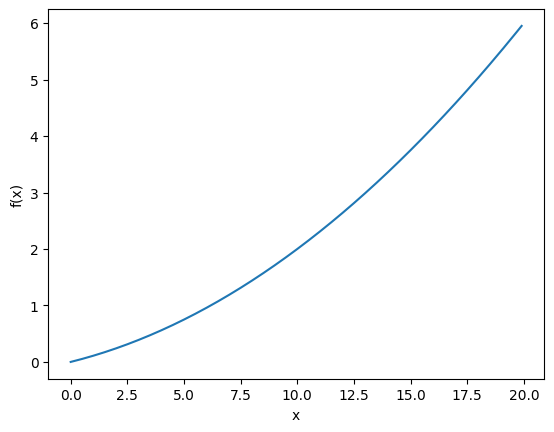

In [5]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

In [6]:
numerical_diff(function_1, 5), numerical_diff(function_1, 10)

(1.9999999999908982e-09, 2.999999999986347e-09)

* 이렇게 계산한 미분 값이 $x$에 대한 $f(x)$의 변화량이다. 즉, 함수의 기울기에 해당한다.
* 또한 $f(x)$의 해석적 해는 ${d \over dx}{f(x)} = 0.02x + 0.1$ 이다.
* 그래서 $x=5$와 $x=10$ 일때의 진정한 미분은 0.2와 0.3이다.
* 앞의 수치 미분의 결과와 비교하면 오차가 매우 작음을 알 수 있다.

### 4.3.3 편미분

* $f({x_0}, {x_1}) = {x_0^2} + {x_1^2}$
* 위 식은 파이썬으로 다음과 같이 구현할 수 있다.

In [7]:
def function_2(x):
    return x[0]**2 + x[1]**2

* 위 식을 미분해보자. 여기서 변수가 두개인 점에 주의해야 한다.

In [8]:
# x_0 = 3, x_1 = 4 일 때 x_0에 대한 편미분을 구하여라.

def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.000000000003781e-08

In [9]:
# x_0 = 3, x_1 = 4 일 때 x_1에 대한 편미분을 구하여라.

def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119e-08

## 4.4 기울기

* 앞의 예에서는 $x_0$와 $x_1$의 편미분을 변수별로 따로 계산했다.
* 그럼 동시에 계산하고 싶으면 어떻게 해야할까?
* 가령 $x_0=3$, $x_1=4$ 일 때 $(x_0, x_1)$ 양 쪽의 편미분을 묶어서 $({\partial{f}\over\partial x_0}, {\partial{f}\over\partial x_1})$을 계산한다고 생각해보자. 
* 이 때 $({\partial{f}\over\partial x_0}, {\partial{f}\over\partial x_1})$처럼 모든 변수의 편미분을 벡터로 정리한것을 <span style="color:blue">기울기</span>라고 한다.
* 기울기는 예를 들어 다음과 같이 구할 수 있다.

In [10]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h)
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h)
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
    
    return grad

* numerical_gradient(f, x) 함수의 구현은 조금 복잡해 보이지만, 동작 방식은 변수가 하나일 때의 수치 미분과 거의 같다.
* 참고로 np.zeros_like(x)는 x와 형상이 같고 그 원소가 모두 0인 배열을 만든다.
* 그러면 이 함수를 사용하여 세 점 (3, 4), (0, 2), (3, 0) 에서의 기울기를 구해보자.

In [11]:
numerical_gradient(function_2, np.array([3.0, 4.0])),\
numerical_gradient(function_2, np.array([0.0, 2.0])),\
numerical_gradient(function_2, np.array([3.0, 0.0]))

(array([6., 8.]), array([0., 4.]), array([6., 0.]))

* 이처럼 $({x_0}, {x_1})$ 의 각 점에서의 기울기를 계산할 수 있다.
* 이 기울기라는게 무엇을 의미할까?
* 아래 그림을 보자. 다만 여기에서는 기울기의 결과에 마이너스를 붙인 벡터를 그려볼것이다.

![d](gradient.png)

* 기울기 그림은 방향을 가진 벡터로 그려진다.
* 이 그림을 보면 기울기는 최솟값을 가리킨다. 또 최솟값에서 멀어질수록 화살표의 크기가 커진다.
* 위 그림에서 기울기는 가장 낮은 장소를 가리키지만, <span style="color:red">더 정확히 말자하면 기울기가 가리키는 쪽은 각 장소에서 함수의 출력값을 가장 크게 줄이는 방향이다.</span>

### 4.4.1 경사하강법

* Machine Learning 문제 대부분은 학습 단계에서 최적의 매개변수를 찾아낸다.
* 신경망 역시 최적의 매개변수(가중치와 편향)를 학습 시에 찾아야 한다.
* 여기서 최적이란 손실함수가 최솟값이 될 때의 매개변수 값이다.
* 하지만 일반적인 문제의 손실함수는 매우 복잡하다.
* 이런 상황에서 기울기를 잘 이용해 함수의 최솟값을 찾으려는 것이 경사법이다.

* 여기에서 주의할 점은 각 지점에서 함수의 값을 낮추는 방안을 제시하는 지표가 기울기라는 것이다.
* 그러나 기울기가 가리키는 곳에 정말 함수의 최솟값이 있는지 보장할 수 없다.
* 실제로 복잡한 함수에서는 기울기가 가리키는 방향에 최솟값이 없는 경우가 대부분이다.

* 기울어진 방향이 꼭 최솟값을 가리키는것은 아니나, 그 방향으로 가야 함수의 값을 줄일 수 있다.
* 그래서 최솟값이 되는 장소를 찾는 문제에서는 기울기 정보를 단서로 나아갈 방향을 정해야 한다.

* 드디어 경사법이 등장할 차례이다.
* 경사법은 현 위치에서 기울어진 방향으로 일정 거리만큼 이동한다.
* 그런 다음 이동한 곳에서도 마찬가지로 기울기를 구하고, 또 기울어진 방향으로 나아가기를 반복한다.
* 이렇게해서 함수의 값을 점차 줄이는 것이 <span style="color:blue">경사법</span>이다.
* 그럼 경사법을 수식으로 나타내보자.
* $x_0 = {x_0} - {\eta}{\over}{\partial{f}\over\partial x_0}$
* $x_1 = {x_1} - {\eta}{\over}{\partial{f}\over\partial x_1}$
* 여기서 기호$\eta$는 <span style="color:blue">학습률</span>이라고 한다. 매개변수 값을 얼마나 갱신하느냐를 정하는것이 학습률이다.

In [12]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr*grad
    
    return x

* 인수 f는 최적화하려는 함수, init_x는 초깃값, lr은 learning rate를 의미하는 학습률, step_num은 경사법에 따른 반복 횟수를 뜻한다.
* 함수의 기울기는 numerical_gradient(f, x)로 구하고, 그 기울기에 학습률을 곱한 값으로 갱신하는 처리를 step_num번 반복한다.

In [13]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])

gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

* 여기에서는 초깃값을 (-3.0, 4.0)으로 설정한 후 경사법을 사용해 최솟값 탐색을 시작한다.
* 최종 결과는 (-6.1e-10, 8.1e-10)으로 거의 (0, 0)에 가까운 결과이다.
* 경사법을 사용한 이 갱신과정을 그림으로 나타내면 다음과 같다.

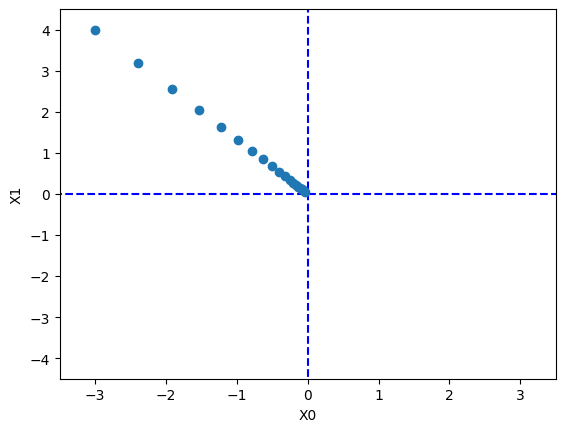

In [14]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

* 학습률이 너무 크거나 작으면 어떻게 될까? 그럼 두 가지 경우를 실험해보자.

In [15]:
# learning rate가 너무 큰 경우 : lr=10

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100),\

# learning rate가 너무 작은 경우 : lr=1e-10

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

(array([-2.99999994,  3.99999992]),
 array([[-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  3.99999999],
        [-3.        ,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999998,  3.99999998],
        [-2.99999998,  3.999

* 학습률이 너무 크면 큰 값으로 발산해버린다.
* 반면 학습률이 너무 작으면 거의 갱신되지 않고 끝난다.

### 4.4.2 신경망에서의 기울기

* 신경망 학습에서도 기울기를 구해야 한다. 여기서 말하는 기울기는 가중치 매개변수에 대한 손실 함수의 기울기이다.
* 예를 들어 형상이 2X3, 가중치가 $\mathbf{w}$, 손실함수가 $\mathbf{L}$인 신경망을 생각해보자.
* 이 경우 경사는 $\partial{L}\over{\partial{\mathbf{W}}}$로 나타낼 수 있다. 수식으로는 다음과 같다.


${\mathbf{W}}=\begin{pmatrix} w_{11} & w_{12} & w_{13}\\ w_{21} & w_{22} & w_{23} \end{pmatrix}$


${\partial{L}\over{\partial{\mathbf{W}}}}=\begin{pmatrix} \partial{L}\over{\partial{{w_{11}}}} & \partial{{L}}\over{\partial{{w_{12}}}} & \partial{{L}}\over{\partial{{w_{13}}}}\\ \partial{{L}}\over{\partial{{w_{21}}}} & \partial{{L}}\over{\partial{{w_{22}}}} &  \partial{{L}}\over{\partial{{w_{23}}}} \end{pmatrix}$

* $\partial{L}\over{\partial{\mathbf{W}}}$ 의 각 원소는 각각의 원소에 대한 편미분이다.
* 여기서 중요한점은 $\partial{L}\over{\partial{\mathbf{W}}}$의 형상이 $\mathbf{W}$와 같다는 것이다.

In [16]:
import numpy as np

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [17]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 값 복원
        it.iternext()   
        
    return grad

In [18]:
net = simpleNet()

print(net.W, '\n', '-'*50) # 가중치 매개변수

x = np.array([0.6, 0.9])
p = net.predict(x)

print(p, '\n', '최댓값의 인덱스 :', np.argmax(p), '\n', '-'*50)

t = np.array([0, 0, 1]) # 정답 레이블
print(net.loss(x, t), '\n','-'*50)

def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[-0.18880527  0.72421927 -1.28806707]
 [ 0.45681659  0.1950698   1.43928339]] 
 --------------------------------------------------
[0.29785177 0.61009438 0.52251481] 
 최댓값의 인덱스 : 1 
 --------------------------------------------------
1.061365012064317 
 --------------------------------------------------
[[ 0.1658197   0.22659032 -0.39241002]
 [ 0.24872954  0.33988548 -0.58861502]]


* numerical_gradient(f, x)의 인수 f는 함수, x는 함수 f의 인수이다.
* 그래서 여기에서는 net.W 를 인수로 받아 손실 함수를 계산하는 새로운 함수 f를 정의했다. 그리고 이 새로 정의한 함수를 numerical_gradient(f, x)에 넘긴다.
* dW는 numerical_gradient(f, x)의 결과로 형상은 2x3의 2차원 배열이다.

## 4.5 학습 알고리즘 구현하기

#### <span style='background-color:yellow'>전제</span> <br/>
신경망에는 적응 가능한 가중치와 편향이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 '학습'이라고 한다.<br/>신경망 학습은 다음과 같이 4단계로 수행한다.

#### <span style='background-color:yellow'>1단계 - 미니배치</span> <br/>
훈련데이터 중 일부를 무작위로 가져온다. 이렇게 선별한 배치를 <span style='color:blue'>미니배치</span>라 하며, <br/>그 미니배치의 손실 함수 값을 줄이는 것이 목표이다.

#### <span style='background-color:yellow'>2단계 - 기울기 산출</span> <br/>
미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다.<br/>
기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시한다

#### <span style='background-color:yellow'>3단계 - 매개변수 갱신</span> <br/>
가중치 매개변수를 기울기 방향으로 아주 조금 갱신한다.

#### <span style='background-color:yellow'>4단계 - 반복</span> <br/>
1~3단계를 반복한다.

#### 이것이 신경망 학습이 이뤄지는 순서이다.<br/> 
#### 이는 <span style='color:blue'>경사 하강법</span>으로 매개변수를 갱신하는 방법이며, 이 때 데이터를 미니배치로 무작위로 선정하기 때문에 <span style='color:blue'>확률적 경사 하강법</span>이라고 부른다.<br/>
#### 대부분의 딥러닝 프레임워크는 확률적 경사 하강법의 영어 머리글자를 딴 <span style='color:blue'>SGD</span>라는 함수로 이 기능을 구현하고 있다.

### 4.5.1 2층 신경망 클래스 구현하기

In [19]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
    
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
    
    # 성능 개선판
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)
        
        return grads

* 중요한 변수와 메서드들을 표에 정리하였다.<br/>
<img src="https://velog.velcdn.com/images%2Fkimkihoon0515%2Fpost%2F82ae1e3a-a69d-44bb-aa5d-249453518fcd%2Fimage.png" align="left"><br/>
<img src="https://velog.velcdn.com/images%2Fkimkihoon0515%2Fpost%2F98a95d81-ff2c-4432-86bf-85d50aff7e74%2Fimage.png" align="left">

* TwoLayerNet 클래스는 딕셔너리인 params와 grads를 인스턴스 변수로 갖는다.
* params 변수에는 가중치 매개변수가 저장된다. 다음 예를 보자.

In [20]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


* 이와 같이 params 변수에는 이 신경망에 필요한 모든 매개변수가 저장된다.
* 그리고 params 변수에 저장된 가중치 매개변수가 예측 처리(순방향 처리)에서 사용된다.
* grads 변수에는 params 변수에 대응하는 각 매개변수의 기울기가 저장된다.
* TwoLayerNet의 메서드를 살펴보면, 우선 __init__ 메서드는 클래스를 초기화한다. 인수는 순서대로 입력층 뉴런 수, 은닉층 뉴런 수, 출력층 뉴런 수이다.
* 이 초기화 메서드에서는 가중치 매개변수도 초기화한다.
* loss(self, x, t)는 손실 함수의 값을 계산하는 메서드이다. 이 메서드는 predict()의 결과와 정답 레이블을 바탕으로<br/> 교차 엔트로피 오차를 구하도록 구현하였다.
* 마지막 gradient(self, x, t) 메서드는 오차역전파법을 사용하여 기울기를 효율적이고 빠르게 계산한다.

### 4.5.2 미니배치 학습 구현하기

* 미니배치 학습이란 훈련 데이터 중 일부를 무작위로 꺼내고 그 미니배치에 대해서 경사법으로 매개변수를 갱신한다.

In [21]:
import numpy as np
from mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

# Hyperparameter
iters_num = 10000    # 반복 횟수
train_size = x_train.shape[0]
batch_size = 100     # 미니배치 크기
learning_rate = 0.1

train_loss_list = []

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = network.gradient(x_batch, t_batch) 
    
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, t_batch)
    
    train_loss_list.append(loss)


* 여기에서는 미니배치 크기를 100으로 했다. 즉, 매번 60,000개의 훈련 데이터에서 임의로 100개의 데이터(이미지 데이터와 정답 레이블 데이터)를 추려낸다.
* 그리고 그 100개의 미니배치를 대상으로 확률적 경사 하강법을 수행해 매개변수를 갱신한다.
* 경사법에 의한 갱신 횟수(반복 횟수)를 10,000번으로 설정하고, 갱신 할 때 마다 훈련 데이터에 대한 손실함수를 계산하고, 그 값을 배열에 추가한다.

### 4.5.3 시험 데이터로 평가하기

* 신경망 학습에서는 훈련 데이터 외의 데이터를 올바르게 인식하는지를 확인해야 한다.
* 다른 말로 <span style="color:blue">오버피팅</span>을 일으키지 않는지 확인해야 한다.
* 오버피팅되었다는것은, 훈련 데이터에 포함된 데이터만 제대로 구분하고, 그렇지 않은 데이터는 식별할 수 없다는 뜻이다.

train acc, test acc | 0.09871666666666666, 0.098
train acc, test acc | 0.78505, 0.7925
train acc, test acc | 0.8781666666666667, 0.8819
train acc, test acc | 0.8978333333333334, 0.8997
train acc, test acc | 0.9079833333333334, 0.9109
train acc, test acc | 0.9136166666666666, 0.9166
train acc, test acc | 0.91875, 0.9208
train acc, test acc | 0.9227833333333333, 0.9233
train acc, test acc | 0.9271333333333334, 0.928
train acc, test acc | 0.9305333333333333, 0.9316
train acc, test acc | 0.93295, 0.9333
train acc, test acc | 0.9357166666666666, 0.9358
train acc, test acc | 0.9389166666666666, 0.9389
train acc, test acc | 0.94075, 0.9393
train acc, test acc | 0.9429333333333333, 0.9417
train acc, test acc | 0.9450666666666667, 0.9434
train acc, test acc | 0.9468666666666666, 0.9452


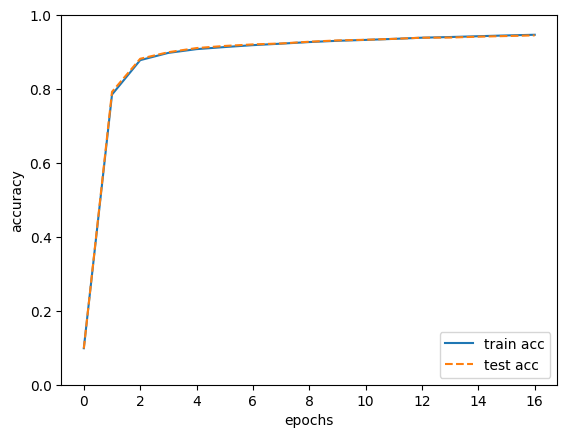

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mnist import load_mnist


# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

* 그래프를 보면, 학습이 진행될수록 훈련 데이터를 사용하고 시험 데이터를 평가한 정확도가 모두 좋아지고 있다.
* 또, 두 정확도에는 차이가 없음을 알 수 있다. 다시말해 이번 학습에서는 오버피팅이 발생하지 않았다.